# Bank Loan Prediction 
Checkout my notebook if it can help anyone. Happy Learning!  

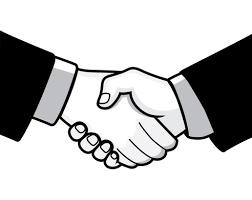  
  
I have found a very little work done in R. Most of the Notebooks are written in Python. So, i decided   to do this in R.  
we will use Supervised learning technique by building classification models including Logistic   Regression and DecisionTree. I have found some other useful and well written notebooks at this   platform but i will try to cover if anything is missed from them.     

**The Workflow stages**  
Kindly refer to The Table of Contents  

# Problem

We have the dataset of a bank who provides loan to its customers. The management has decided to attract the customers to get the personal loan from bank. our job is to analyse their data and build the model to find the potential customers who could get personal loan. so, that the bank can run its marketing campaign keeping in view the customers who could most likely get loan. 
We have dataset defining different attributes of the customers. let's install the required libraries and have a breif overview of the data



# Logistic Regression 
Logistic regression refers to any regression model in which the response variable is categorical in nature.  
**Binary logistic regression**: The response variable can only belong to one of two categories.  
**Multinomial logistic regression**: The response variable can belong to one of three or more  categories and there is no natural ordering among the categories for example yes, no, neutral.  
**Ordinal logistic regression**: The response variable can belong to one of three or more categories   and there is a natural ordering among the categories for example low, medium and high.  
In our case we will explore the first type of regression which is Binary Logistic Regression where   the response variable has two categories, Yes or No. 

In [1]:
## Libraries ##
library(dplyr)
library(ggplot2)
library(lubridate)
library(Hmisc)
library(corrplot)
library(caret)
library(caTools)
library(ROCR)
library(party)
library(rpart)
library(rpart.plot)
library(ROSE)
library(randomForest)

# Attach the Dataset #
bankloan<-read.csv('../input/classification/bankloan.csv')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.88 loaded


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:httr’:

    progress


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading re

In [2]:
nrow(bankloan)
ncol(bankloan)

[1] 5000

[1] 14

So, our data has 5000 rows and 14 columns. Let's dig a bit deep
Now, we will find the datatypes of our data and a breif summary of each variable

In [3]:
summary(bankloan)  
head(bankloan)  

       ID            Age          Experience       Income          ZIP.Code    
 Min.   :   1   Min.   :23.00   Min.   :-3.0   Min.   :  8.00   Min.   : 9307  
 1st Qu.:1251   1st Qu.:35.00   1st Qu.:10.0   1st Qu.: 39.00   1st Qu.:91911  
 Median :2500   Median :45.00   Median :20.0   Median : 64.00   Median :93437  
 Mean   :2500   Mean   :45.34   Mean   :20.1   Mean   : 73.77   Mean   :93152  
 3rd Qu.:3750   3rd Qu.:55.00   3rd Qu.:30.0   3rd Qu.: 98.00   3rd Qu.:94608  
 Max.   :5000   Max.   :67.00   Max.   :43.0   Max.   :224.00   Max.   :96651  
     Family          CCAvg          Education        Mortgage    
 Min.   :1.000   Min.   : 0.000   Min.   :1.000   Min.   :  0.0  
 1st Qu.:1.000   1st Qu.: 0.700   1st Qu.:1.000   1st Qu.:  0.0  
 Median :2.000   Median : 1.500   Median :2.000   Median :  0.0  
 Mean   :2.396   Mean   : 1.938   Mean   :1.881   Mean   : 56.5  
 3rd Qu.:3.000   3rd Qu.: 2.500   3rd Qu.:3.000   3rd Qu.:101.0  
 Max.   :4.000   Max.   :10.000   Max.   :3.

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


we have 14 variables and all of them are integers data type. we may need to remove a couple of them  as they are not helpful. we will talk about them as we jump to clean the data.  
let's take a glimpse of the data  
**Age:** The age of the Customer  
**Experience:** The experience of the customer  
**Income:** The Income of the customer  
**ZipCode:** The area code of the customer they are living in  
**Family:** The number of people in family.  
**CCAvg:** Credit average  
**Education:** The education level of the customer, i.e. Undergraduate, Graduate  
**Personal Loan:** The status of the loan whether the customer opted the loan or not.  
**Online:** If the customer is using online banking  
**Credit Care:** if the customer has a credit card  

#  Data Cleansing
We need to remove the ID column as it is not helpful here. Also, check the null values if any in the data

In [4]:
bankloan<-bankloan[-1]  
NROW(bankloan[complete.cases(bankloan), ])  
NROW(bankloan[!complete.cases(bankloan), ])  
summary(bankloan$Experience)  

[1] 5000

[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -3.0    10.0    20.0    20.1    30.0    43.0 

So, we have successfully removed the ID column. we also could not find any incomplete record in our data. So, far data looks clean.
We note some negetive values in experience which look like a typo error as experience can not be negetive. so we need to fix them

In [5]:
bankloan %>% filter(Experience<0) %>% group_by(Experience) %>%  
summarise(n=n())  

Experience,n
<int>,<int>
-3,4
-2,15
-1,33


In [6]:
bankloan$Experience<-ifelse(bankloan$Experience<0, bankloan$Experience*(-1), bankloan$Experience*1)  
bankloan$Experience[bankloan$Experience<0]  

numeric(0)

We successfully have removed the negetive values in experience. we just multiplied negetive values in experience by -1
Next, we need to convert some of our variable from integers to factores like securities account, CD.Account, Online, Personal loan and credit account to better analyse them visually.

In [7]:
bankloan$Securities.Account <- as.factor(bankloan$Securities.Account)  
 bankloan$CD.Account<-as.factor(bankloan$CD.Account)  
 bankloan$Online<-as.factor(bankloan$Online)  
 bankloan$CreditCard<-as.factor(bankloan$CreditCard)  
 bankloan$Personal.Loan<-as.factor(bankloan$Personal.Loan)  

We successfully have converted the above integers into factors. Hence, we can use them to analyse our data graphically in a better way. 
I am also going to categorize the Age and Income so that we can capture any hidden pattern 

In [8]:
bankloan$agecat=cut(bankloan$Age, breaks = c(18,30,40,50,70), labels = c("18-30", "31-40", "41-50","51-70"))  
bankloan$IncomeCat=cut(bankloan$Income, breaks = c(0,20,50,80,100, 300), labels = c("Lower", "Medium", "Upper Medium","Upper", "High Upper"))  

So, we have divided the age and Income in different categorize to understand them more in depth
# Univariate Analysis
We are now analysing each variable in our dataset to have better understanding of the spread of data
**Let's start with Age**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   35.00   45.00   45.34   55.00   67.00 

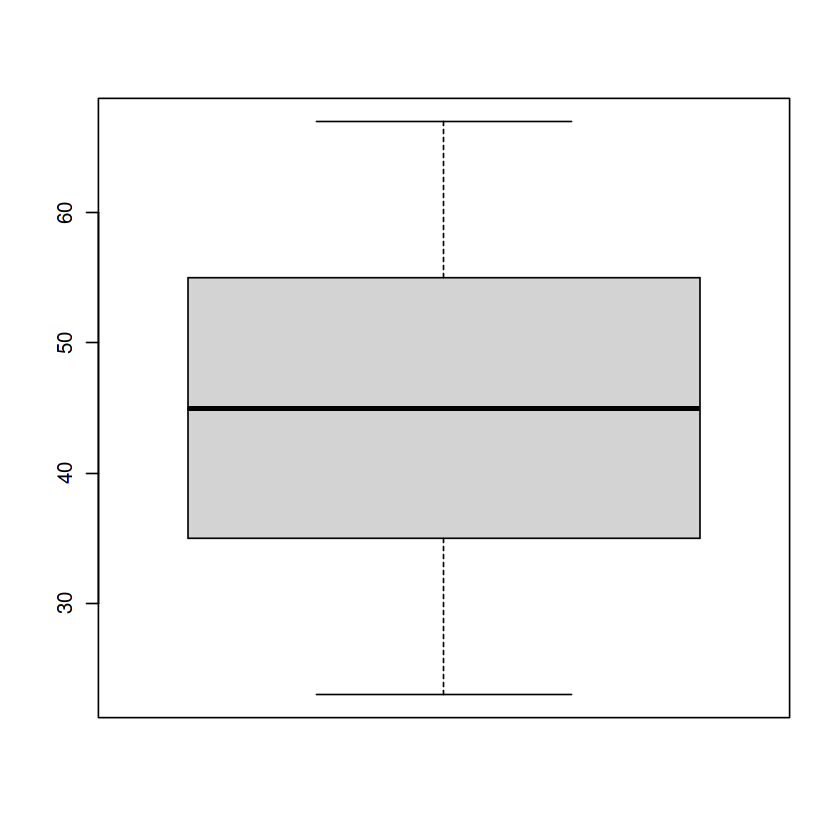

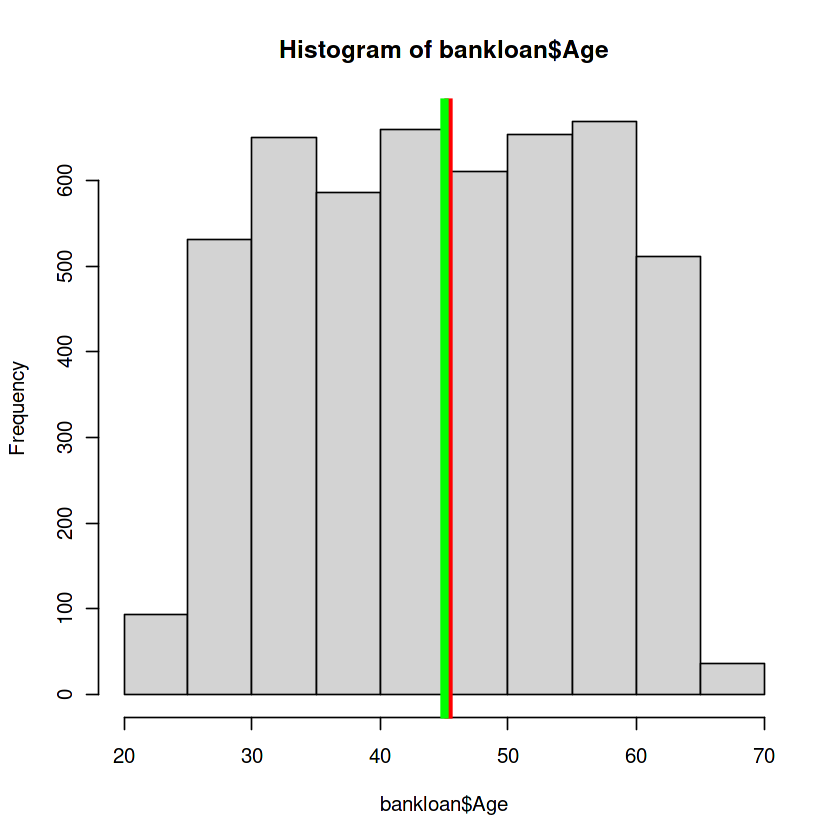

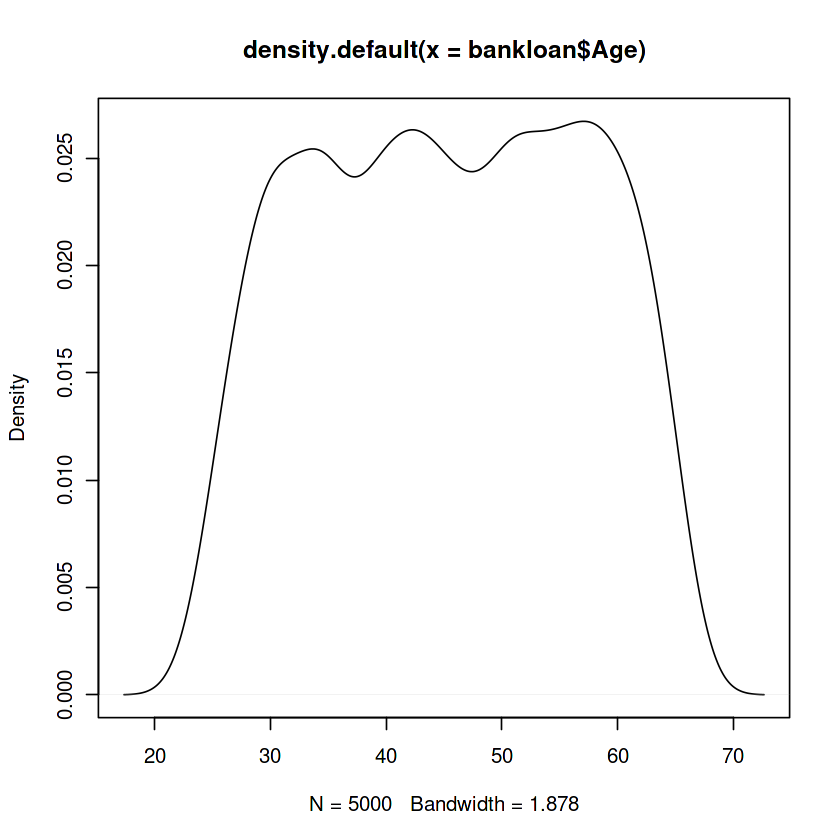

In [9]:
summary(bankloan$Age)  
boxplot(bankloan$Age, width=1)  
hist(bankloan$Age)  
abline(v=mean(bankloan$Age), col="red", lwd=5)  
abline(v=median(bankloan$Age), col="green", lwd=5)  
p<-density(bankloan$Age)  
plot(p)  

Overall the spread of data is not bad. there is not such a big difference between mean and median. also, the boxplot and histogram does not indicate any outliers. 
**Let's study the Experience now.**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   20.00   20.13   30.00   43.00 

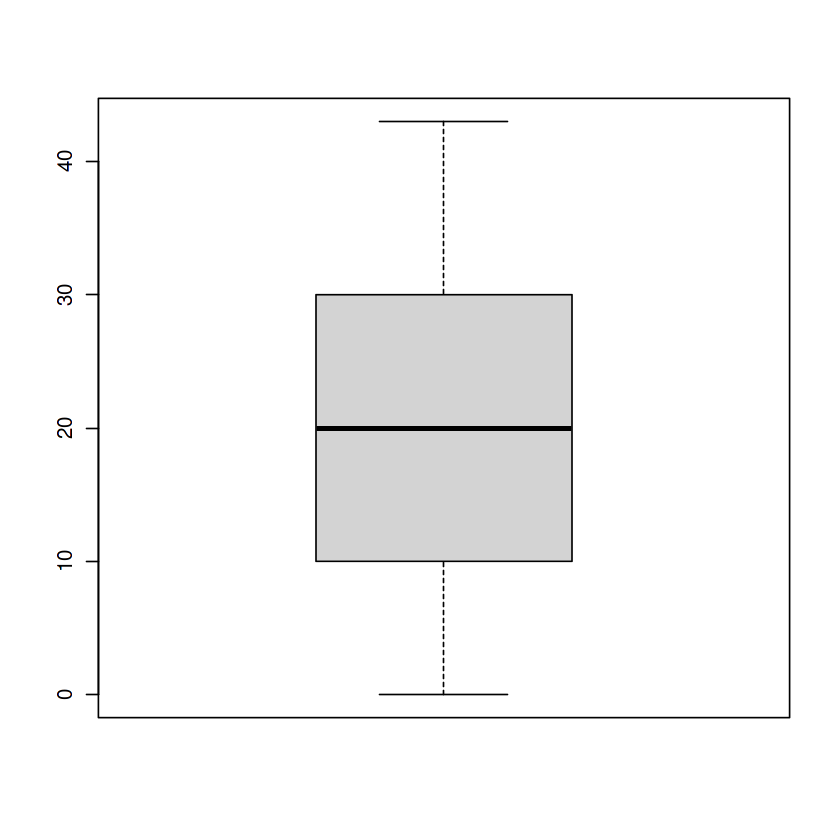

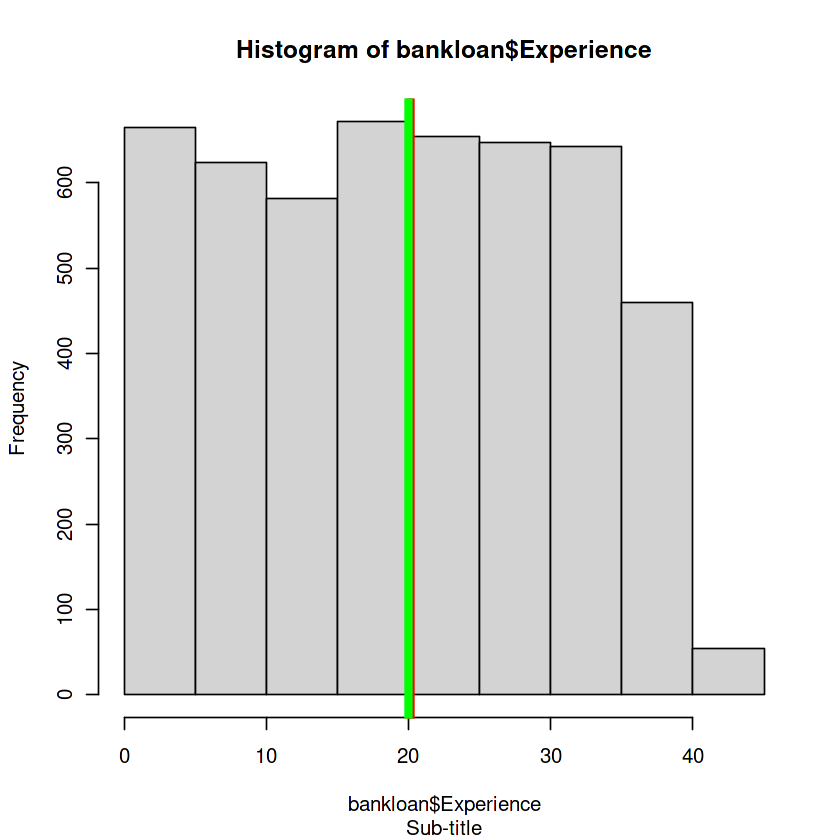

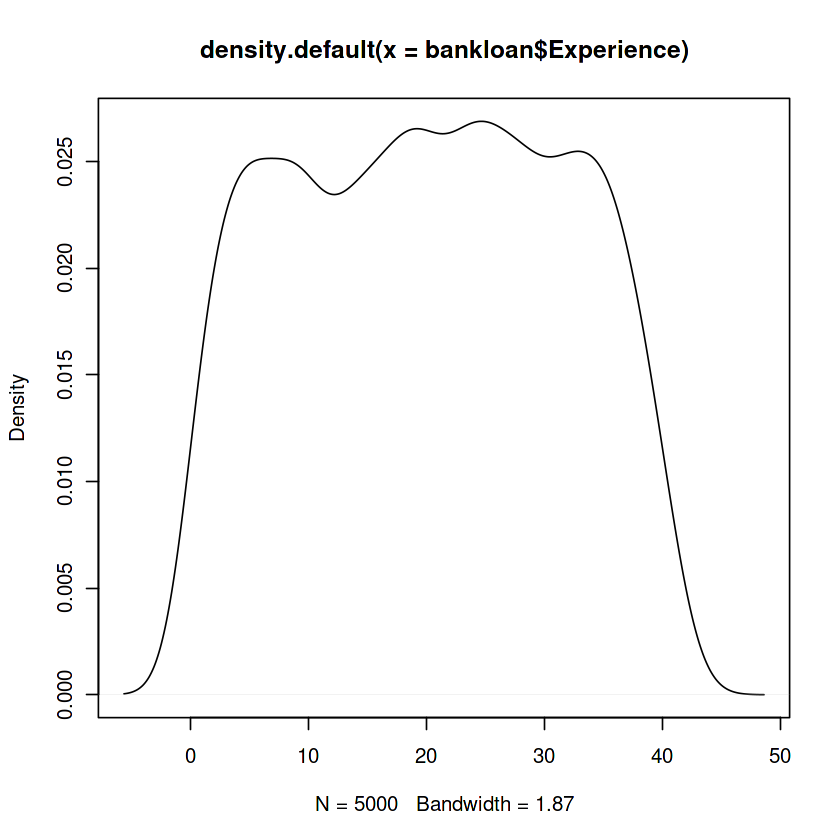

In [10]:
summary(bankloan$Experience)  
boxplot(bankloan$Experience)  
hist(bankloan$Experience, sub="Sub-title")  
abline(v=mean(bankloan$Experience), col="red", lwd=5)  
abline(v=median(bankloan$Experience), col="green", lwd=5)  
p<-density(bankloan$Experience)  
plot(p)  

Again the median and mean are almost at the same place which is a good thing as we do not have to deal wiht the outliers in this case.
Now we move forward to study **Income**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   39.00   64.00   73.77   98.00  224.00 

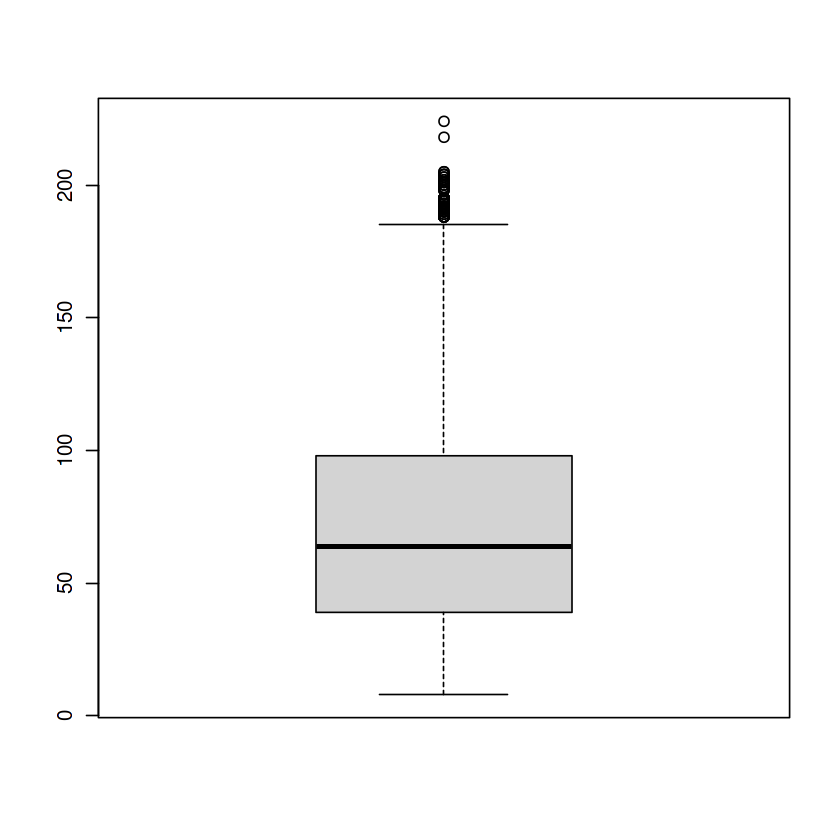

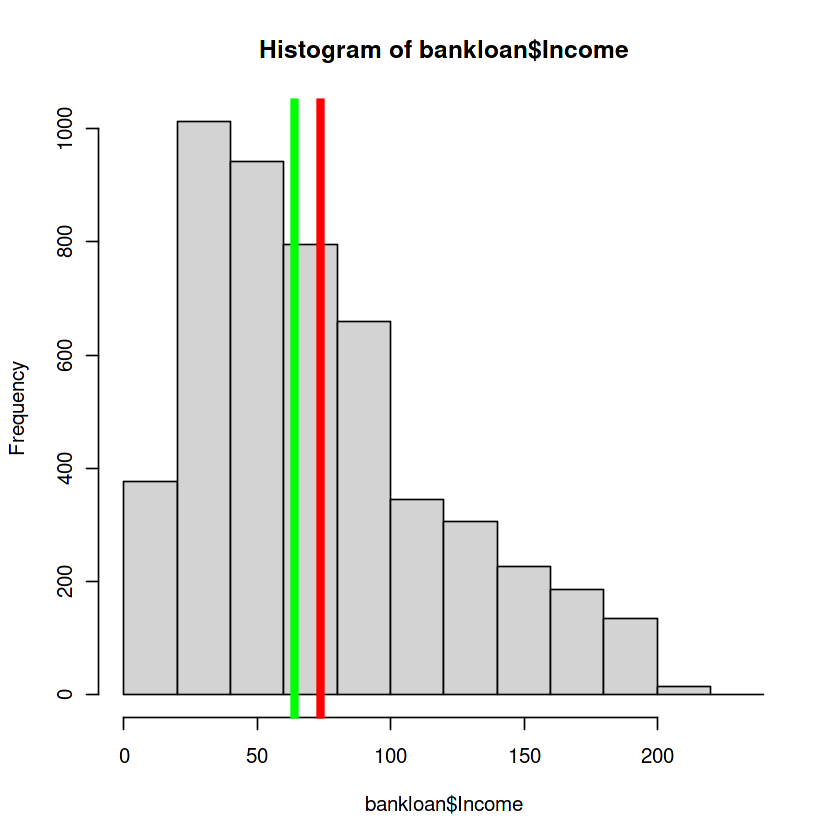

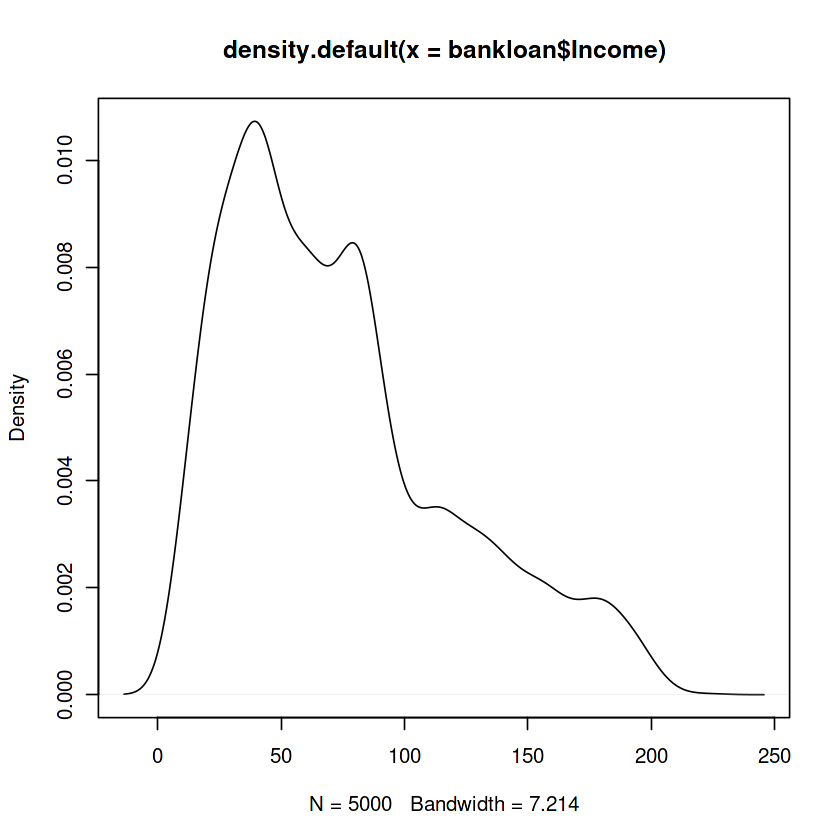

In [11]:
 summary(bankloan$Income)  
boxplot(bankloan$Income) # Some outliers at the upper fence #  
hist(bankloan$Income) # Right skewed #  
abline(v=mean(bankloan$Income), col="red", lwd=5)  
abline(v=median(bankloan$Income), col="green", lwd=5)  
p<-density(bankloan$Income)  
plot(p)  

The spread of data in Income is bit different as expected because the spread of money can never be equal. There are always some outliers. In this case we have to deal with outliers on the upper fence. we will deal with them late on.
Let's study the Family now


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.396   3.000   4.000 

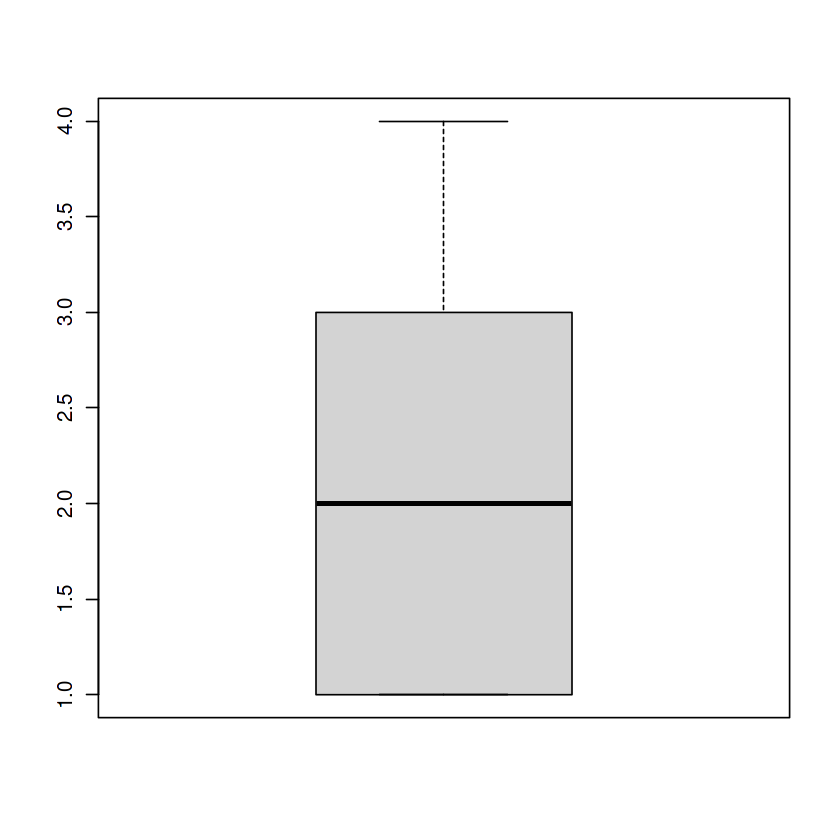

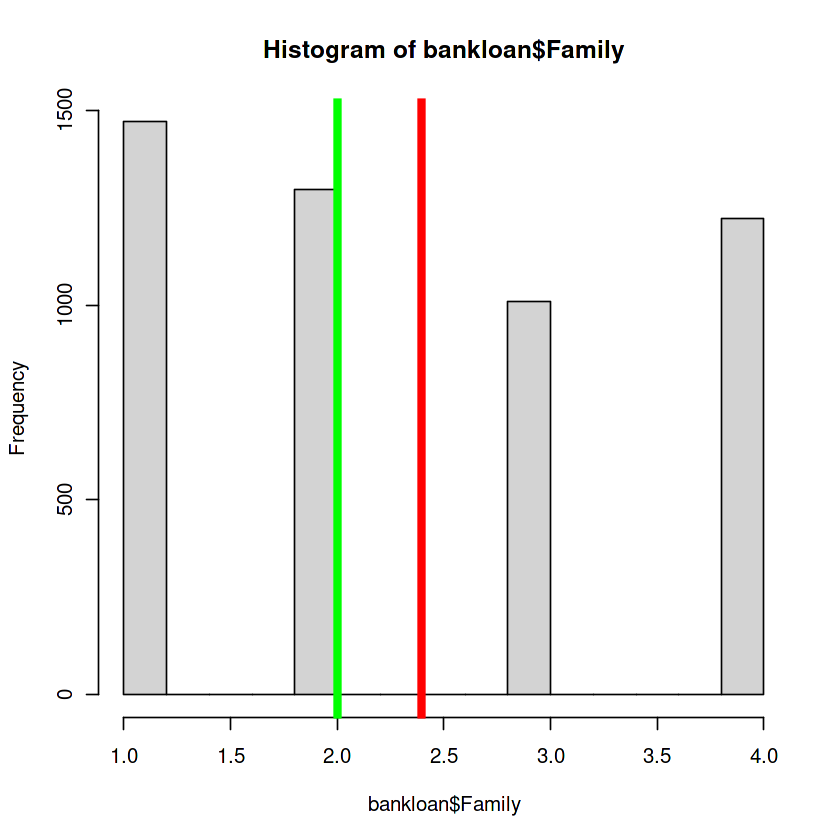

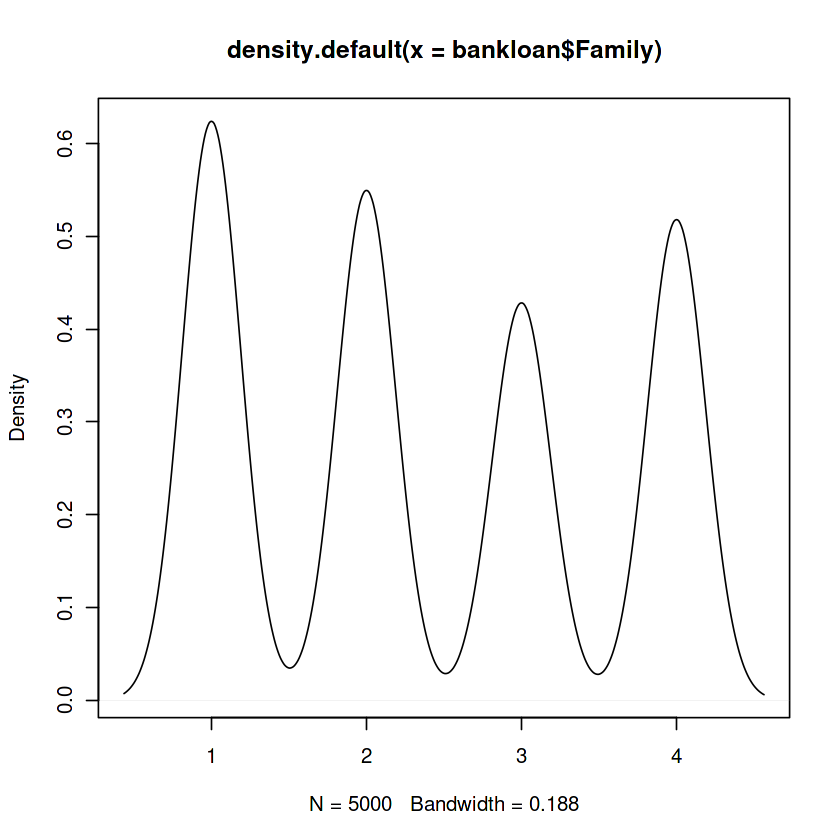

In [12]:
# Family  #  
summary(bankloan$Family)  
boxplot(bankloan$Family) # Some outliers at the upper fence #  
hist(bankloan$Family) # Right skewed #  
abline(v=mean(bankloan$Family), col="red", lwd=5)  
abline(v=median(bankloan$Family), col="green", lwd=5)  
p<-density(bankloan$Family)  
plot(p)  

The Family just shows the number of members. so, there are not outliers as the minimum value is 1 and maximum 4. 
Now we analyse the Credit card average. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.700   1.500   1.938   2.500  10.000 

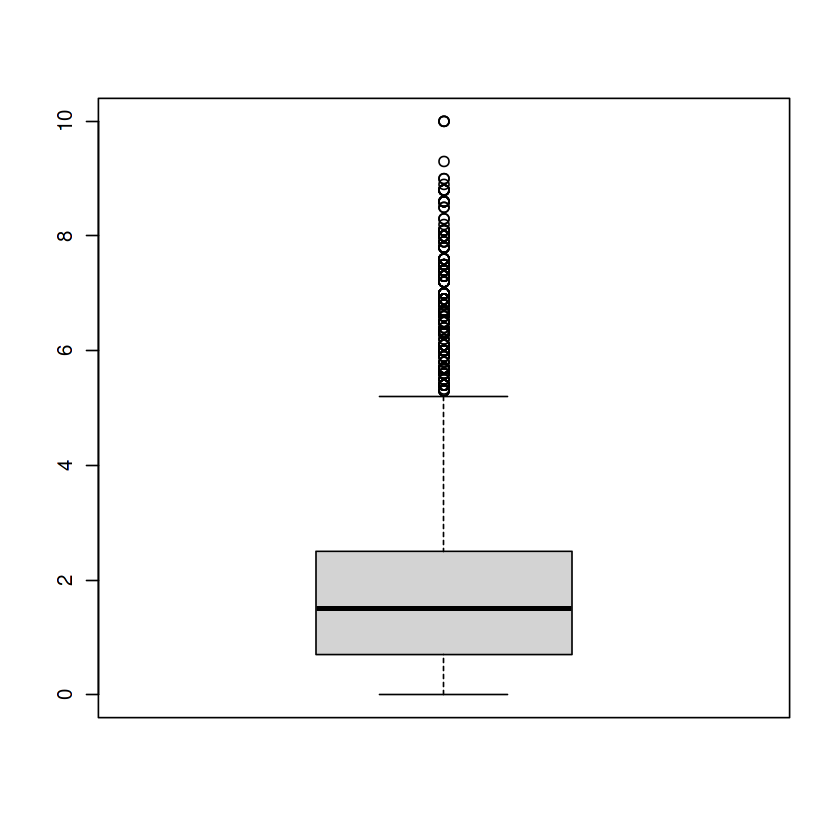

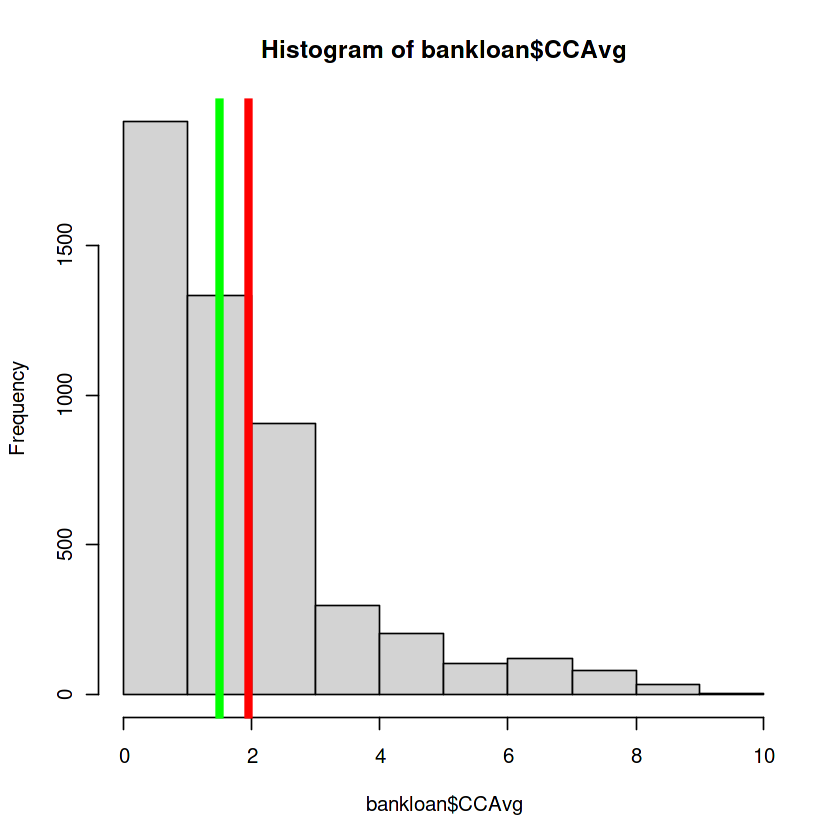

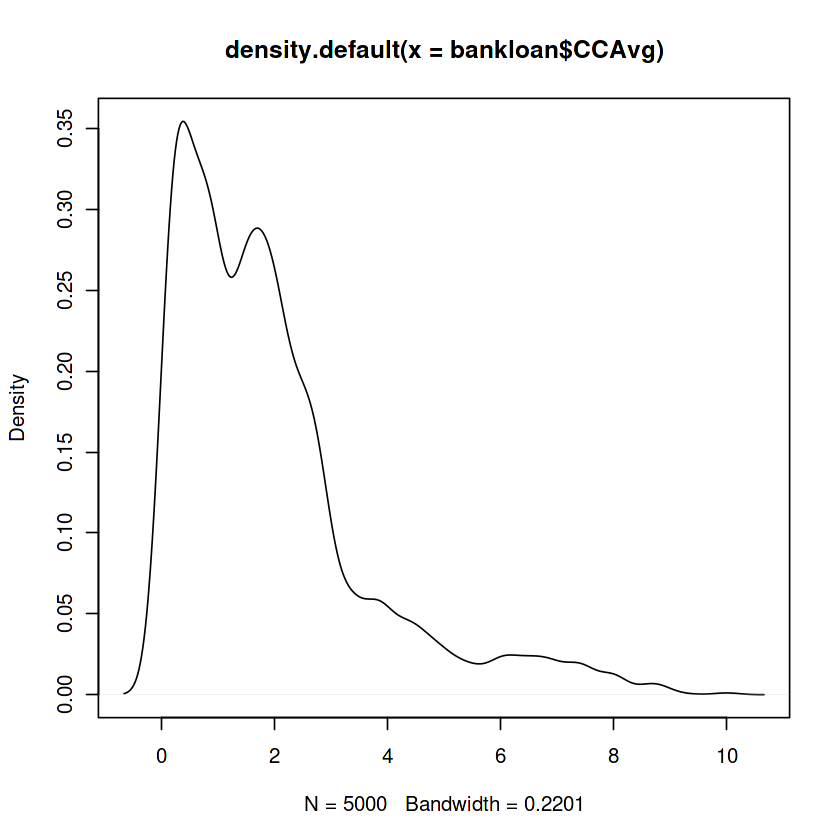

In [13]:
#CCAVG#  
summary(bankloan$CCAvg)  
boxplot(bankloan$CCAvg) #  outliers at the upper fence #  
hist(bankloan$CCAvg) # Right skewed #  
abline(v=mean(bankloan$CCAvg), col="red", lwd=5)  
abline(v=median(bankloan$CCAvg), col="green", lwd=5)  
p<-density(bankloan$CCAvg)  
plot(p)  

the data in credit card average is skewed right. 
Let's consider the **Mortgage** now

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0    56.5   101.0   635.0 

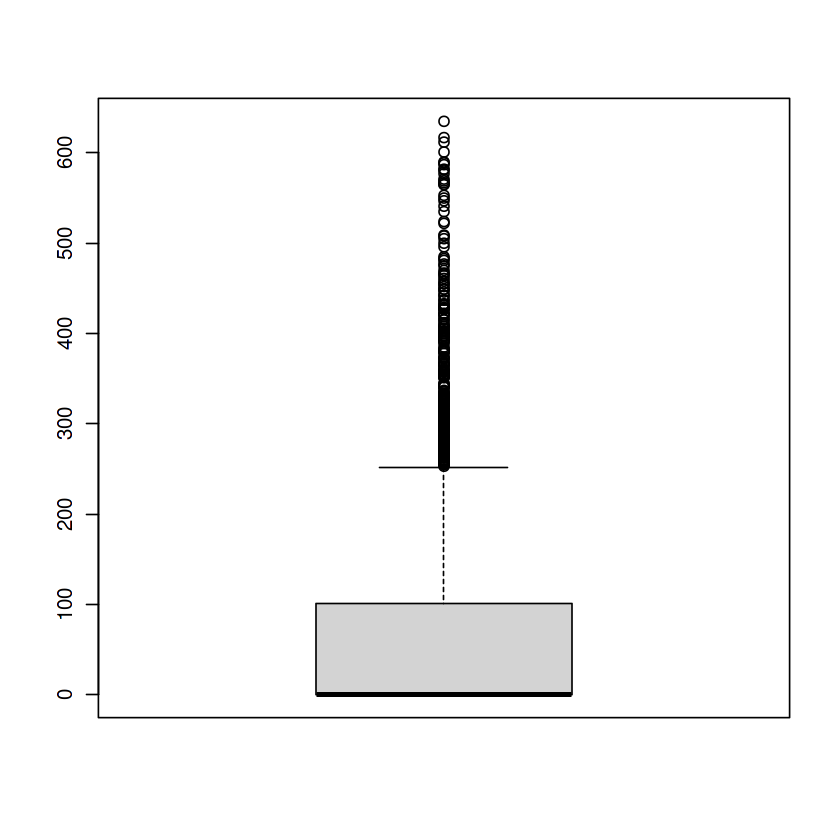

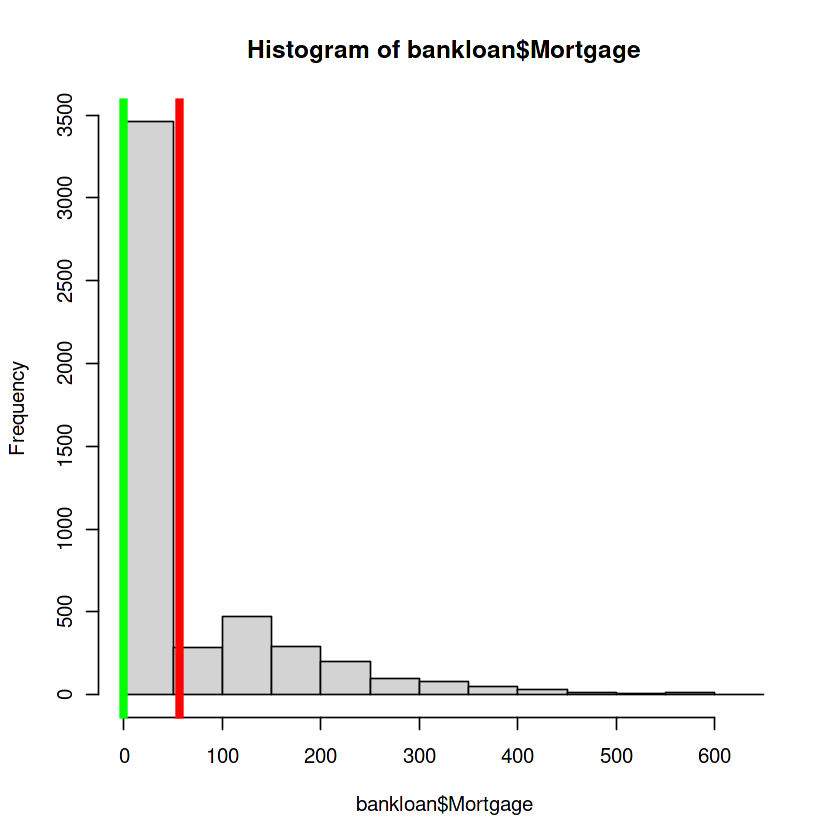

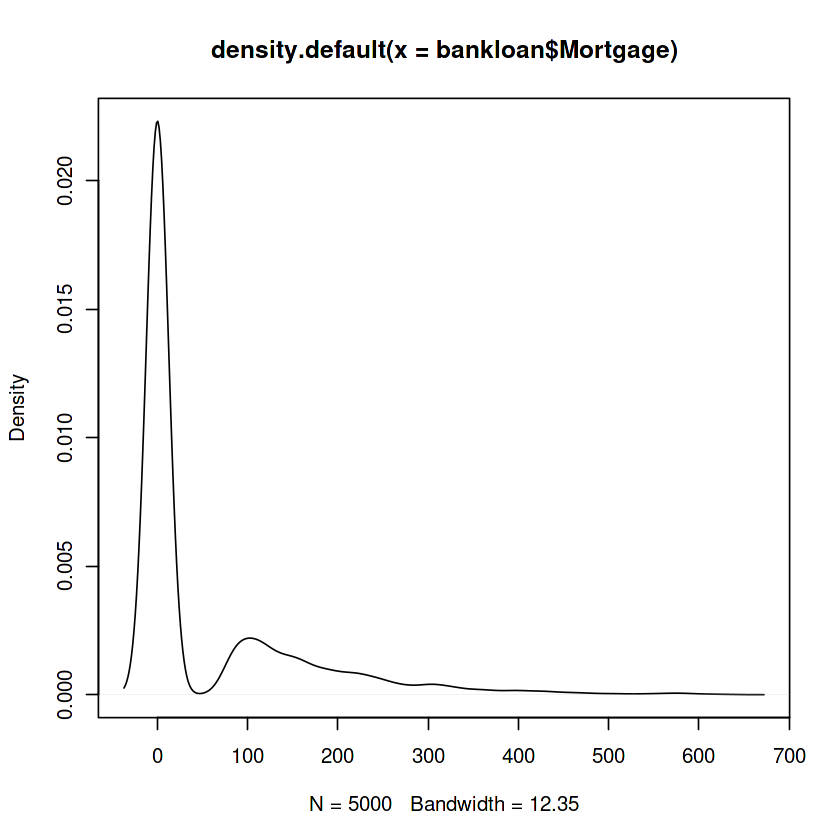

In [14]:
summary(bankloan$Mortgage)  
boxplot(bankloan$Mortgage) #  outliers at the upper fence #  
hist(bankloan$Mortgage) # Right skewed #  
abline(v=mean(bankloan$Mortgage), col="red", lwd=5)  
abline(v=median(bankloan$Mortgage), col="green", lwd=5)  
p<-density(bankloan$Mortgage)  
plot(p)  

The Mortgage is highly skewed towards right. thats mean some people are paying more mortgage than the average.
# Multivariate Analysis
Let's explore the **Income** with other variable and try to find any pattern

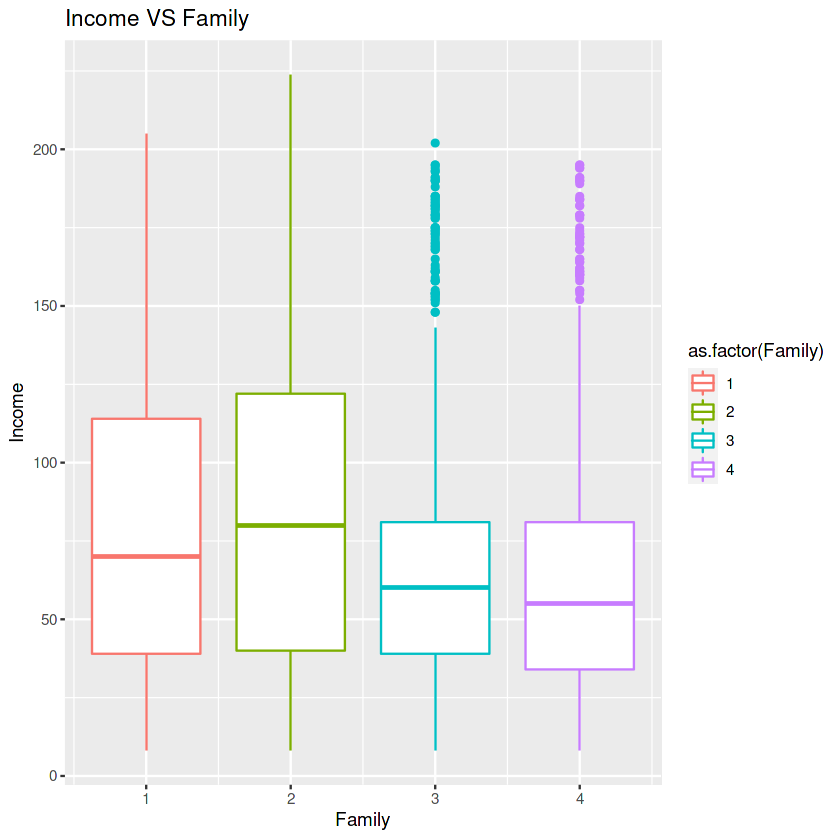

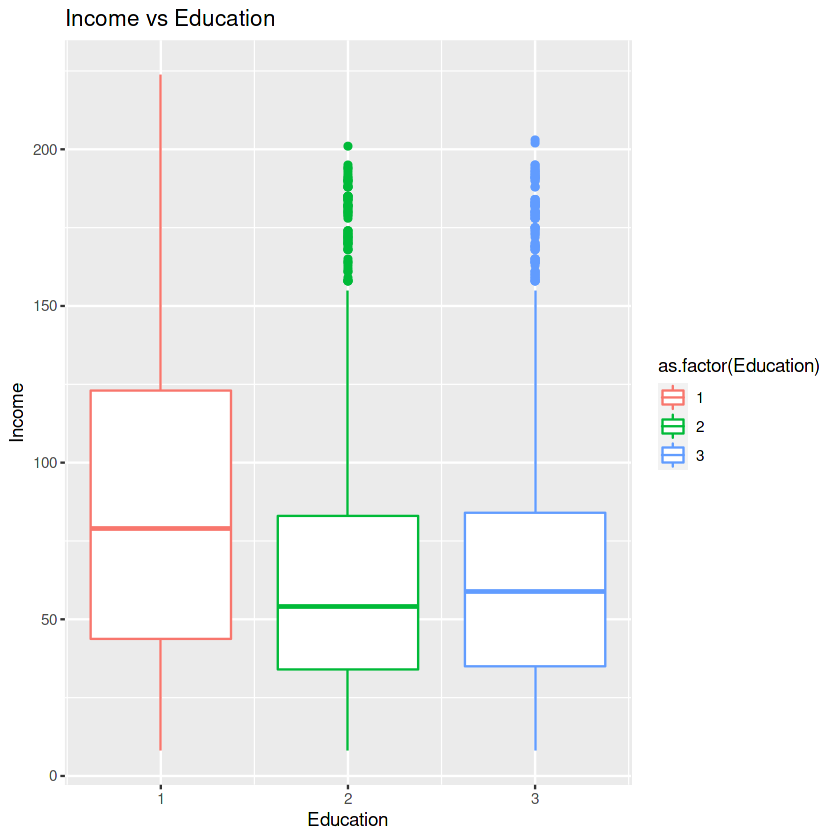

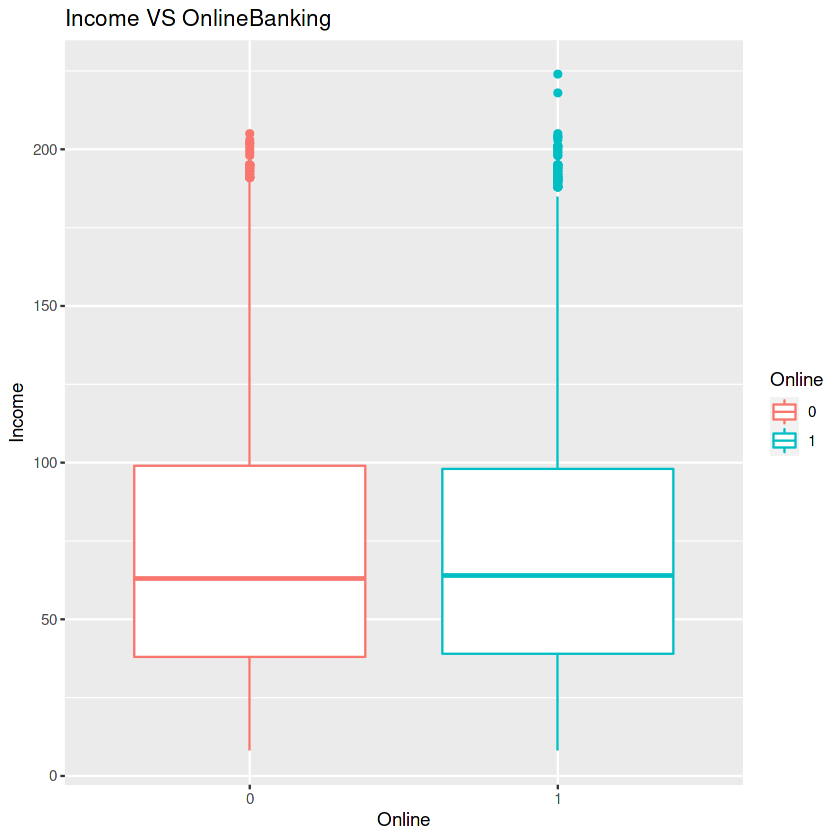

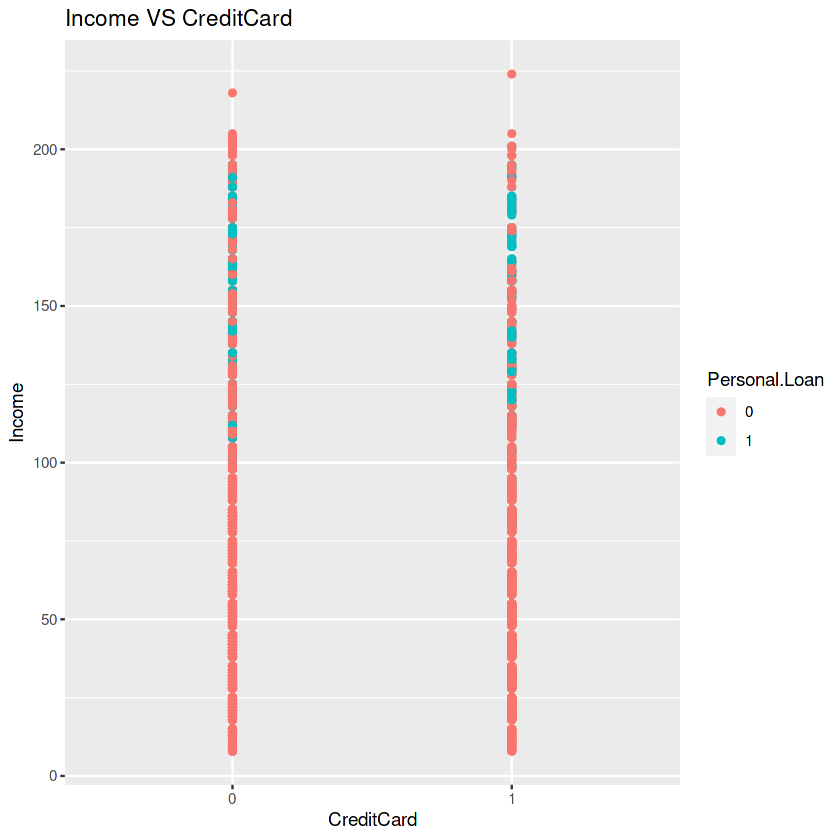

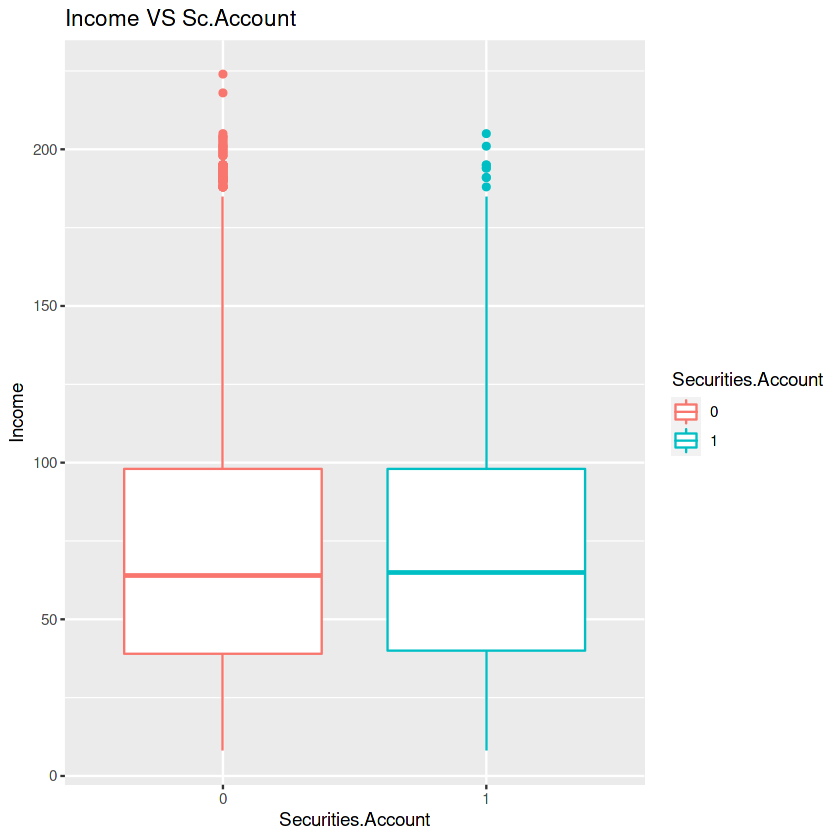

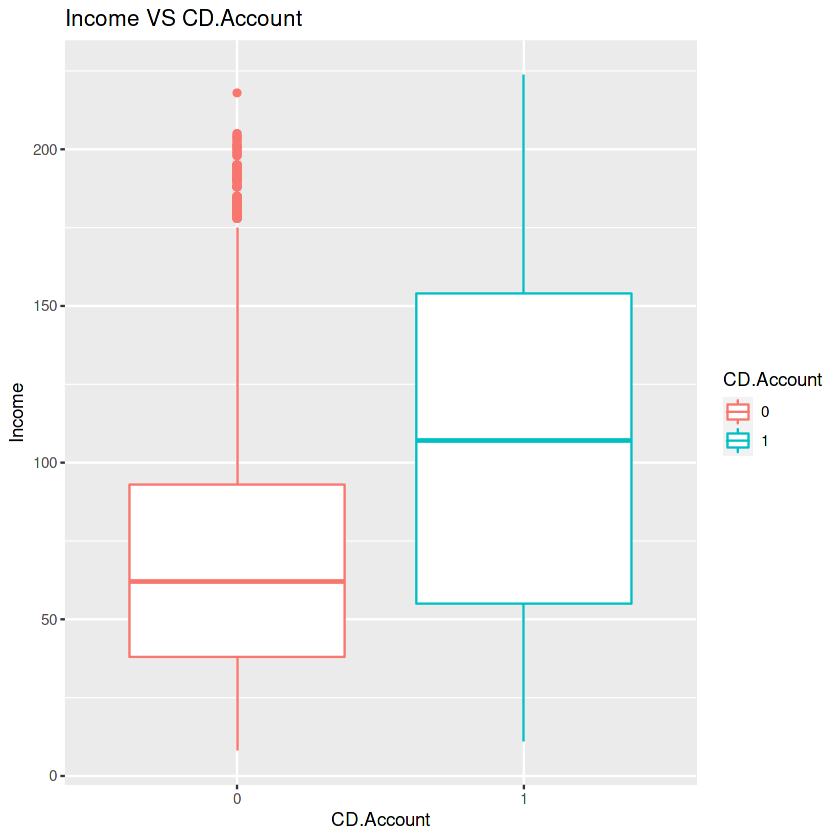

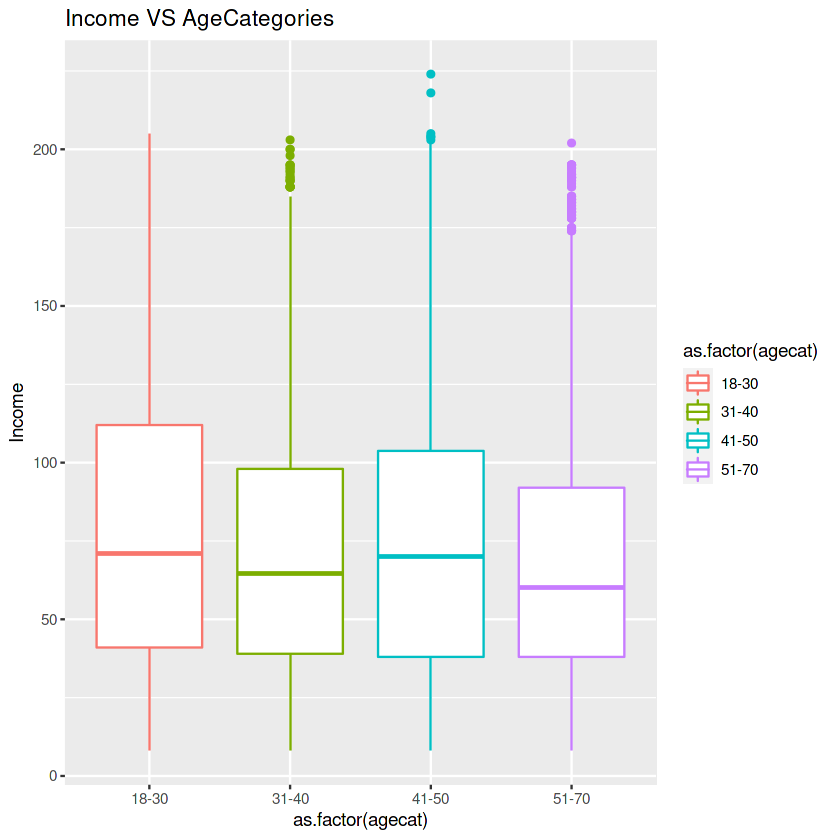

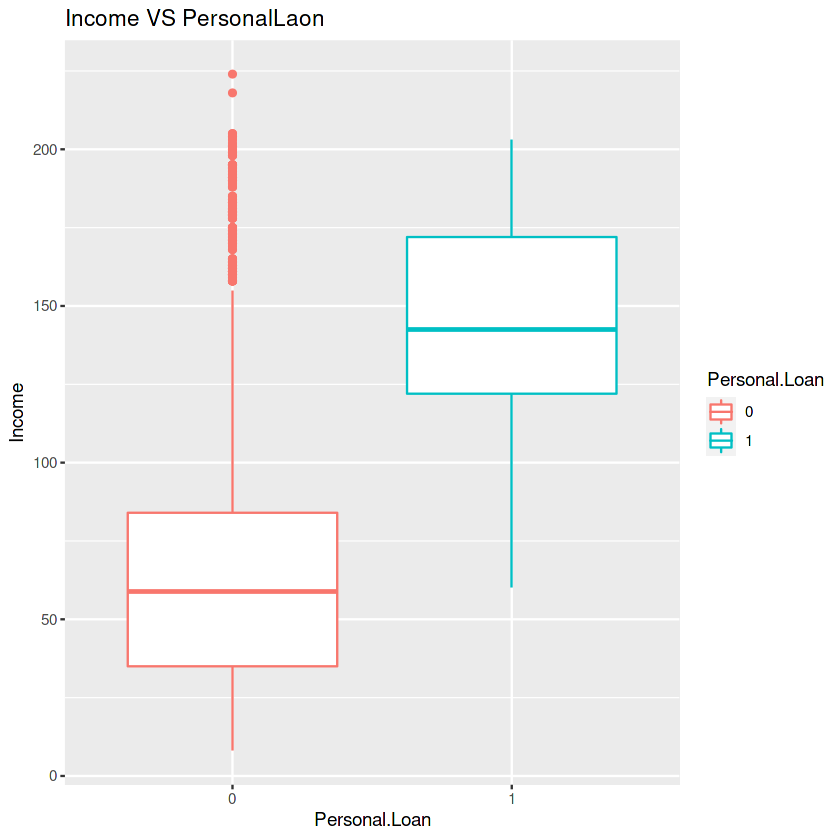

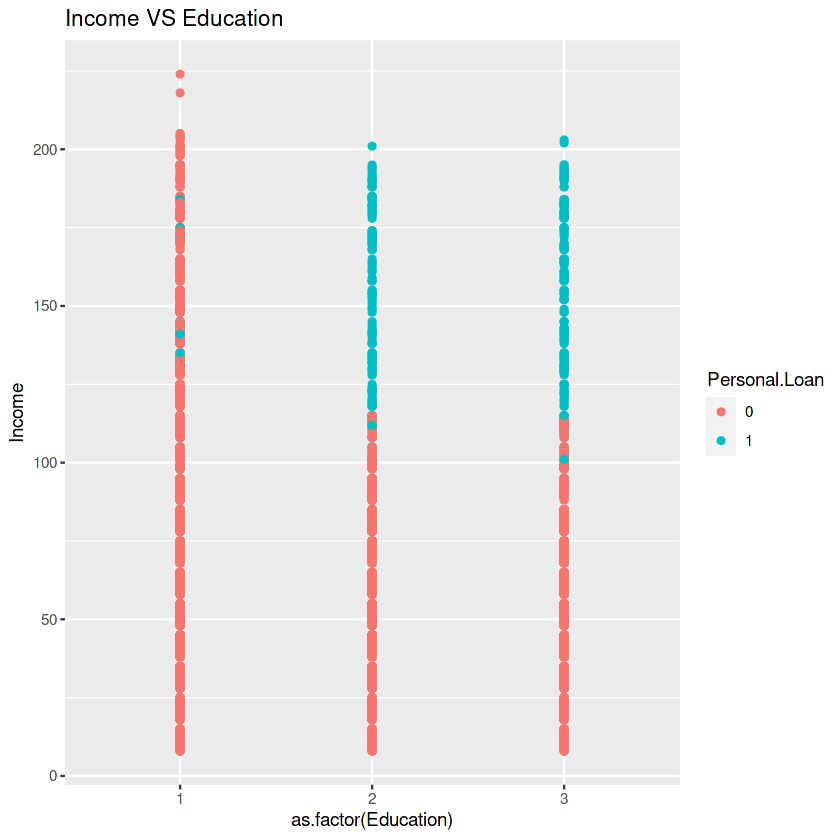

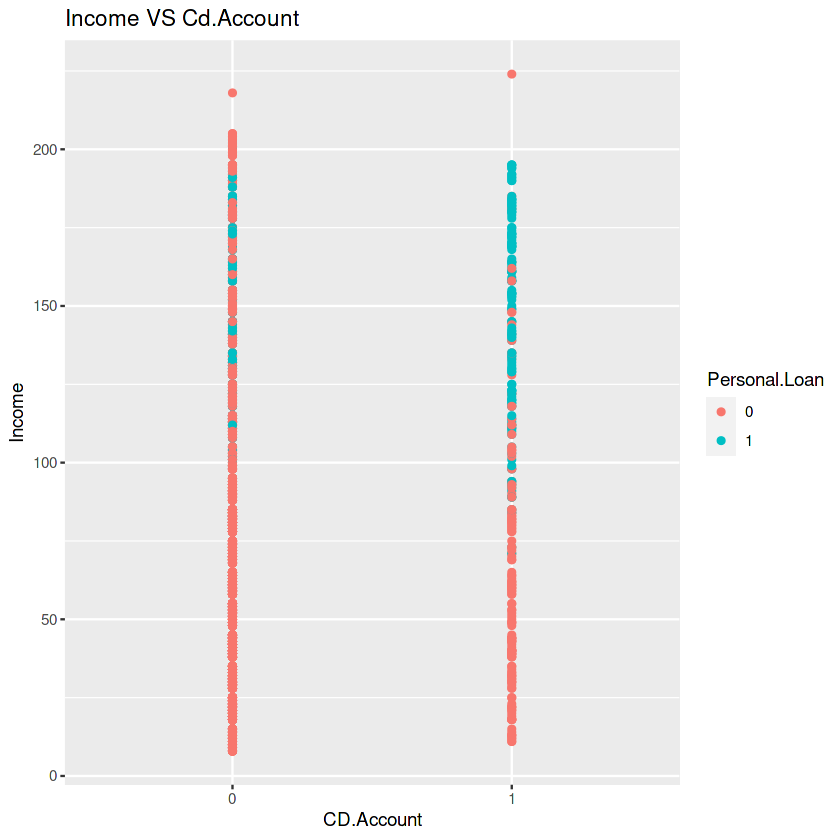

In [15]:
## Income  ##

ggplot(bankloan, aes(x=Family, y=Income, color=as.factor(Family), main="Main title")) +geom_boxplot()+  
ggtitle("Income VS Family")  
ggplot(bankloan, aes(x=Education, y=Income, color=as.factor(Education)))+geom_boxplot()+ggtitle("Income vs Education")  

ggplot(bankloan, aes(x=Online, y=Income, color=Online))+geom_boxplot()+ggtitle("Income VS OnlineBanking")  
ggplot(bankloan, aes(x=CreditCard, y=Income, color=Personal.Loan)) +geom_point()+ggtitle("Income VS CreditCard")  

ggplot(bankloan, aes(x=Securities.Account, y=Income, color=Securities.Account)) +geom_boxplot()+ggtitle("Income VS Sc.Account")  

ggplot(bankloan, aes(x=CD.Account, y=Income, color=CD.Account)) +geom_boxplot()+ggtitle("Income VS CD.Account")  

ggplot(bankloan, aes(x=as.factor(agecat), y=Income, color=as.factor(agecat))) +geom_boxplot()+ggtitle("Income VS AgeCategories")  

ggplot(bankloan, aes(x=Personal.Loan, y=Income, color=Personal.Loan))+geom_boxplot()+ggtitle("Income VS PersonalLaon")  

ggplot(bankloan, aes(x=as.factor(Education), y=Income, color=Personal.Loan)) +geom_point()+ggtitle("Income VS Education")  
ggplot(bankloan, aes(x=CD.Account, y=Income, color=Personal.Loan)) +geom_point()+ggtitle("Income VS Cd.Account")  

**Observations**
* customers with less family members have more money
* Surprisingly customers with undergraduate degrees have more money than the upper two categories
* More educated categories use more online services. Althoug the difference is not so significant. 
* Customers with credit account have more income. 
* Customers with or withour security account have almost the same income.
* Customers with more Income opted to get loan
* More educated people are more likely to get the loan


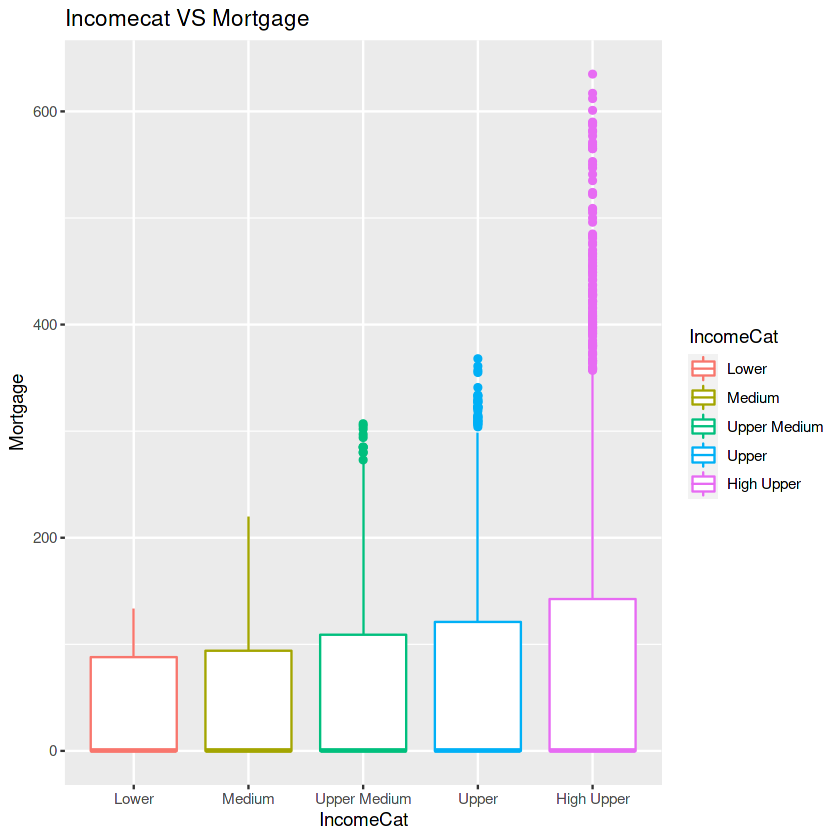

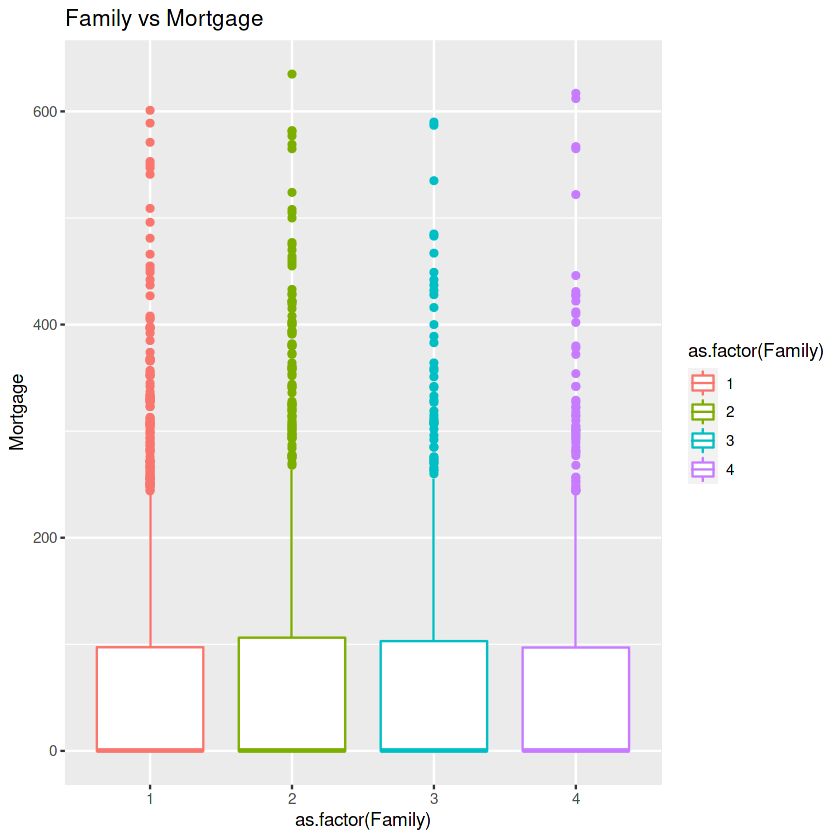

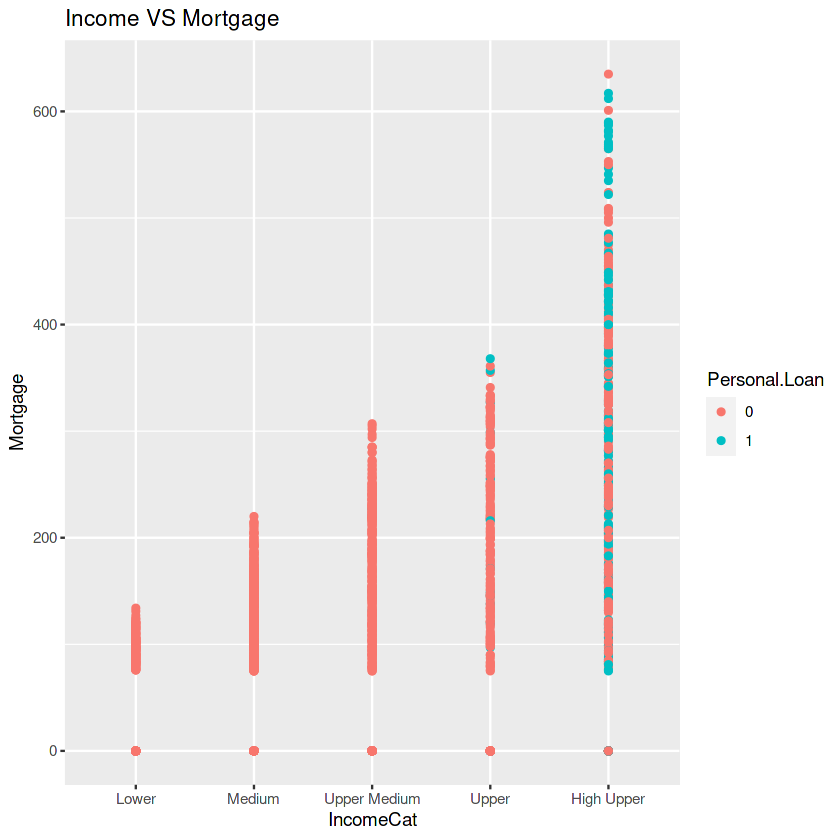

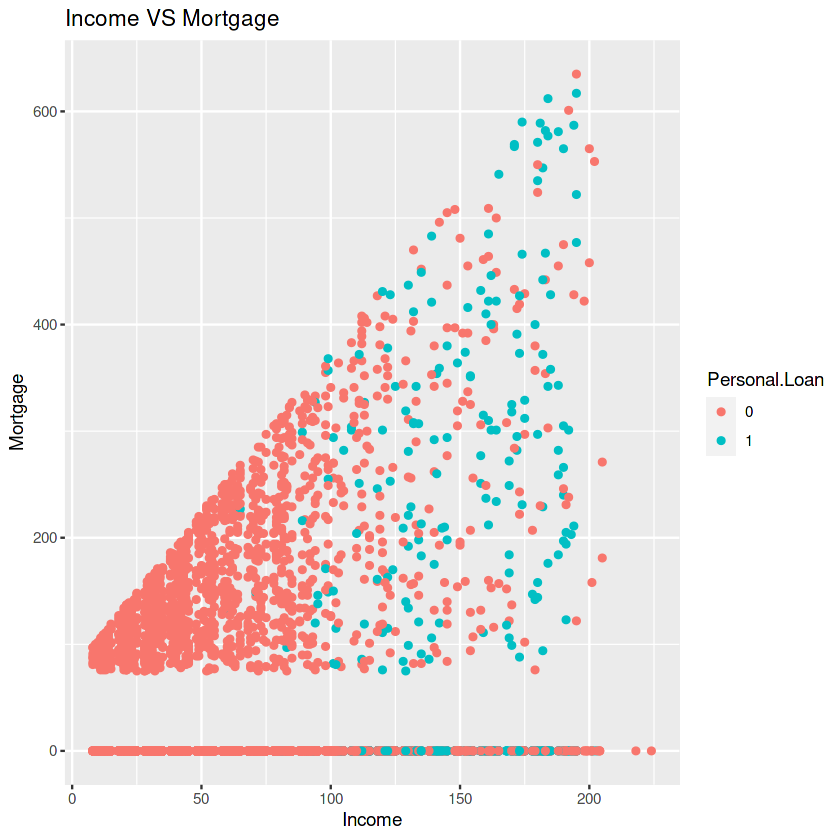

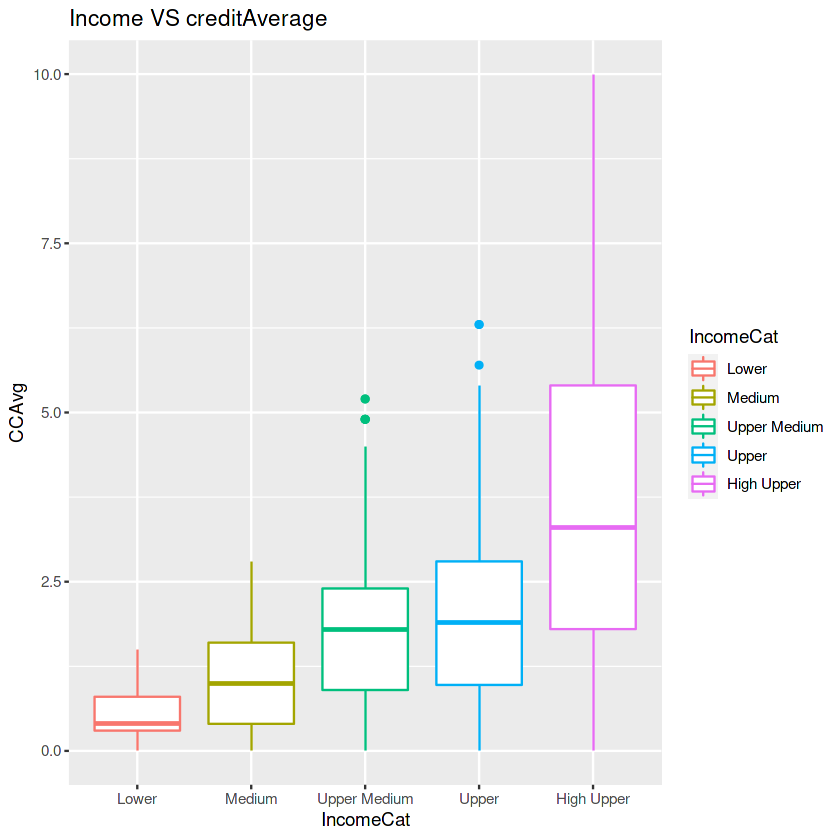

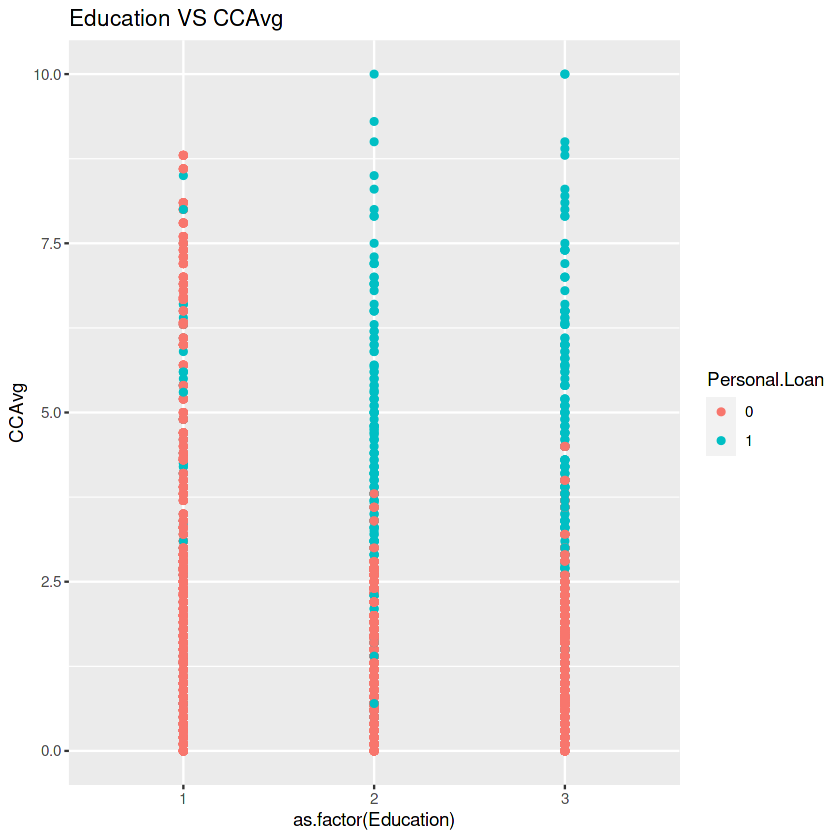

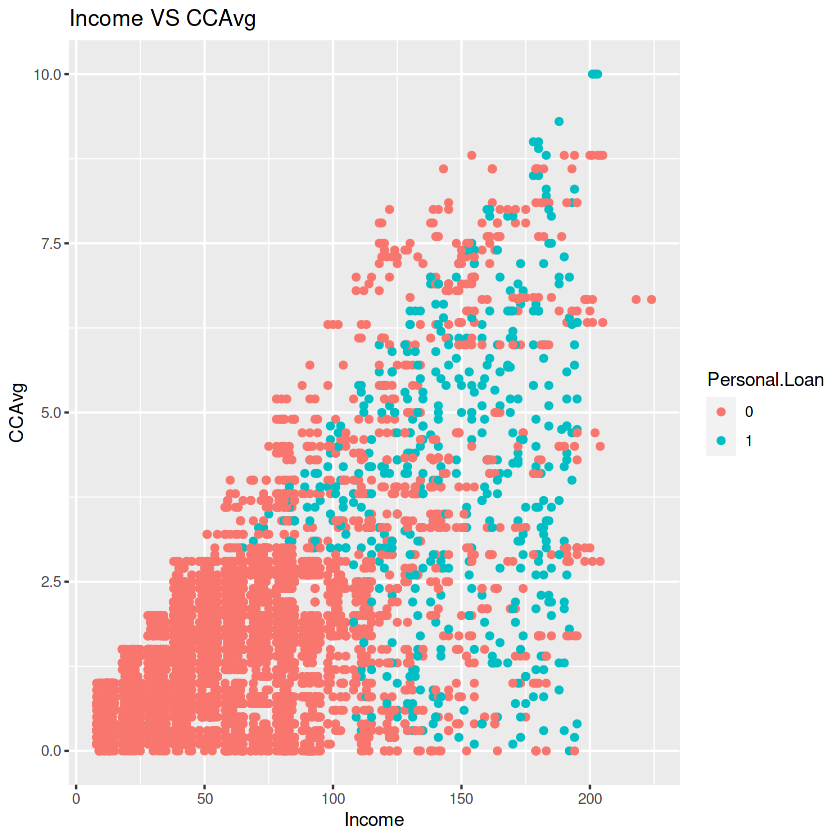

In [16]:
#Mortgage#  
ggplot(bankloan, aes(x=IncomeCat, y=Mortgage, color=IncomeCat)) +geom_boxplot()+ggtitle("Incomecat VS Mortgage")  
ggplot(bankloan, aes(x=as.factor(Family), y=Mortgage, color=as.factor(Family))) +  
geom_boxplot()+ggtitle("Family vs Mortgage")  

ggplot(bankloan, aes(x=IncomeCat, y=Mortgage, color=Personal.Loan)) +geom_point()+ggtitle("Income VS Mortgage") # People with more income and mortgage tends to get personal loan #  
ggplot(bankloan, aes(x=Income, y=Mortgage, color=Personal.Loan))+geom_point()+ggtitle("Income VS Mortgage")  

# CCAVG #  
ggplot(bankloan, aes(x=IncomeCat, y=CCAvg, color=IncomeCat))+geom_boxplot()+ggtitle("Income VS creditAverage") # more income more ccavg #  
ggplot(bankloan, aes(x=as.factor(Education), y=CCAvg, color=Personal.Loan)) +geom_point()+ggtitle("Education VS CCAvg")  

ggplot(bankloan, aes(x=Income, y=CCAvg, color=Personal.Loan))+geom_point()+ggtitle("Income VS CCAvg") #More income more credit average seek personal loan#  

**Observation**
* Customers with more income has more mortgage
* Customers with all Different family size almost have the same mortgage. 
* Customers with more income have more mortgage and are more likely to get personal loan
* Customers with more credit average have more Mortgage
* More educated people have more credit average and opted to get loan
* customer with more income have more credit card average and have opted to borrow loan 

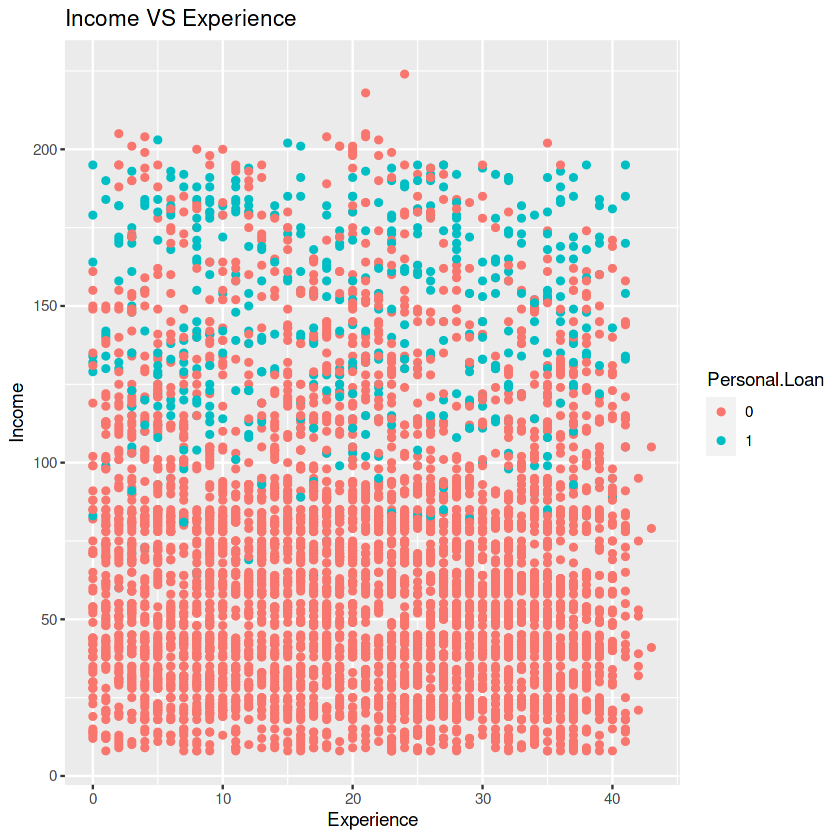

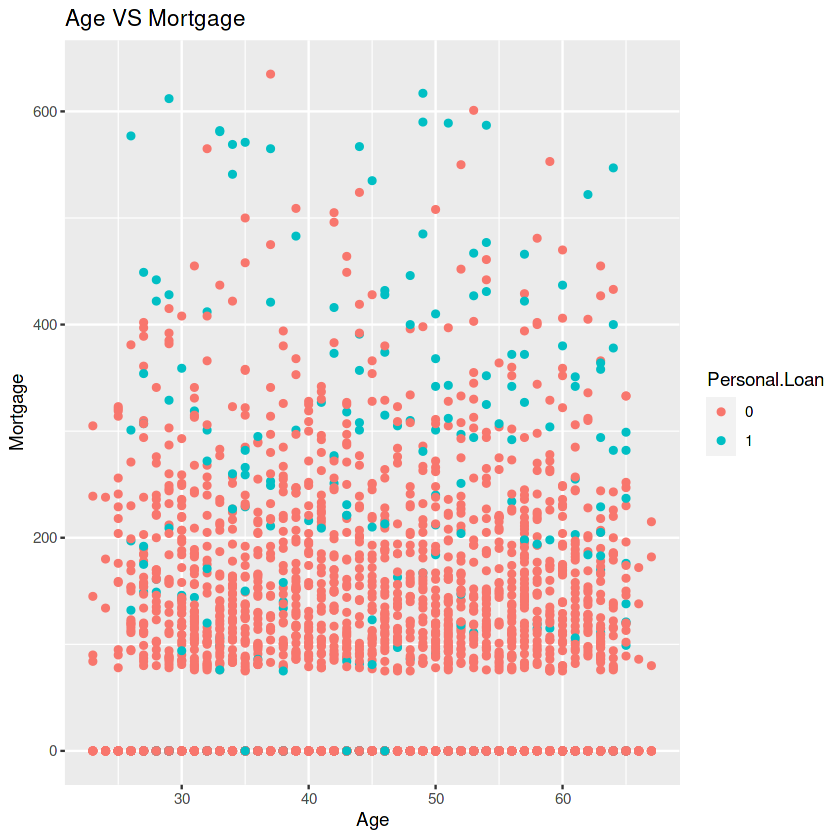

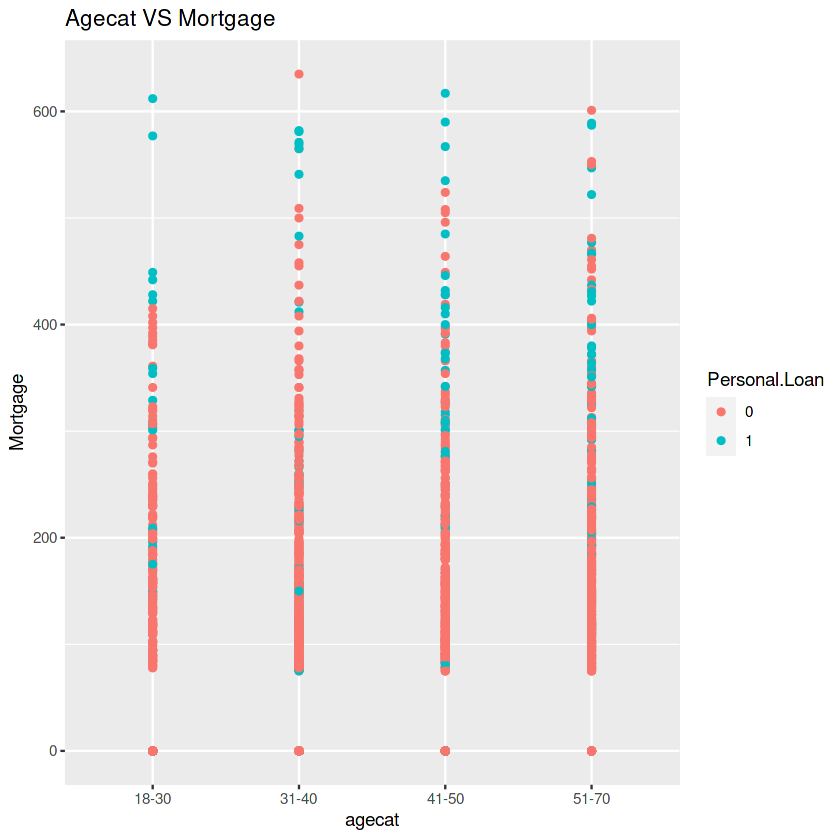

In [17]:

# Experience  #  
ggplot(bankloan, aes(x=Experience, y=Income, color=Personal.Loan)) +  
geom_point()+ggtitle("Income VS Experience") # More income tend to get personal loan #  

ggplot(bankloan, aes(x=Age, y=Mortgage, color=Personal.Loan)) +  
  geom_point()+ggtitle("Age VS Mortgage") # More mortgage opted to loan #  
ggplot(bankloan, aes(x=agecat, y=Mortgage, color=Personal.Loan)) +  
  geom_point()+ggtitle("Agecat VS Mortgage") # More age more mortgage tend to get loan #  


**Observation**
* There is a string relation between income and personal loan. Customer with more income tend to get loan.
* Customers with higher mortgage opted to get loan
* customer falling in upper categories of age have more mortgage and are more likely to borrow loan

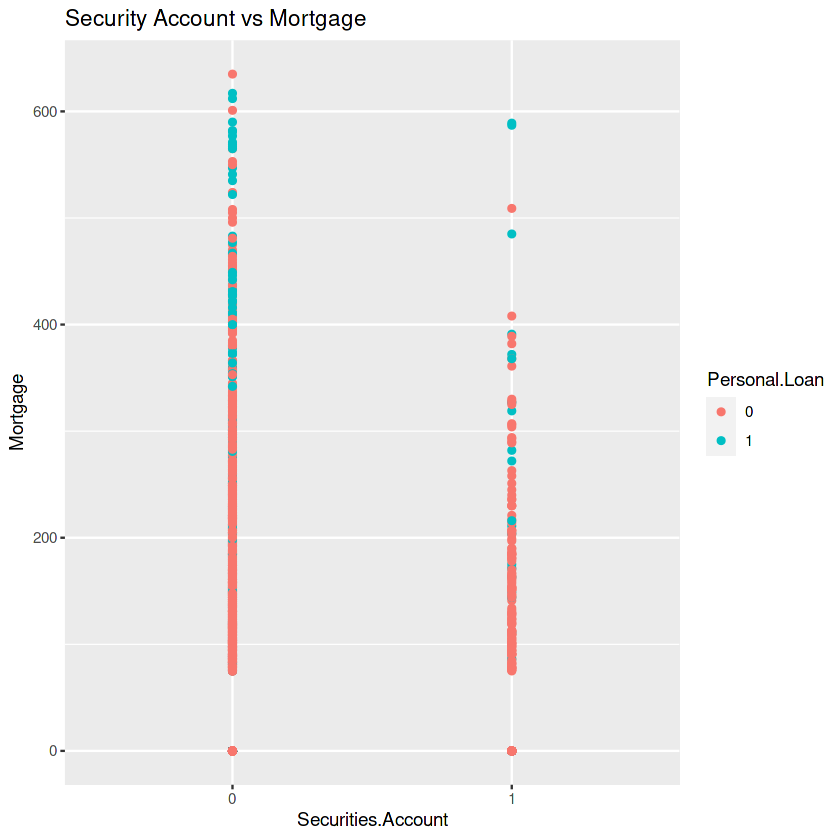

In [18]:
# Securities account #

ggplot(bankloan, aes(x=Securities.Account, y=Mortgage, color=Personal.Loan)) +geom_point()+ggtitle("Security Account vs Mortgage")  

**Observation**
Customers without security account have more mortgage and opted to borrow a personal loan
# Correlation Matrix
Now, we try to find the correlation between different variables in dataset and find out the strength of relation between them

             Age Experience Income Family CCAvg Education Mortgage
Age         1.00       0.99  -0.06  -0.05 -0.05      0.04    -0.01
Experience  0.99       1.00  -0.05  -0.05 -0.05      0.01    -0.01
Income     -0.06      -0.05   1.00  -0.16  0.65     -0.19     0.21
Family     -0.05      -0.05  -0.16   1.00 -0.11      0.06    -0.02
CCAvg      -0.05      -0.05   0.65  -0.11  1.00     -0.14     0.11
Education   0.04       0.01  -0.19   0.06 -0.14      1.00    -0.03
Mortgage   -0.01      -0.01   0.21  -0.02  0.11     -0.03     1.00

n= 5000 


P
           Age    Experience Income Family CCAvg  Education Mortgage
Age               0.0000     0.0000 0.0010 0.0002 0.0035    0.3754  
Experience 0.0000            0.0009 0.0002 0.0004 0.3251    0.4328  
Income     0.0000 0.0009            0.0000 0.0000 0.0000    0.0000  
Family     0.0010 0.0002     0.0000        0.0000 0.0000    0.1483  
CCAvg      0.0002 0.0004     0.0000 0.0000        0.0000    0.0000  
Education  0.0035 0.3251     0.0000 

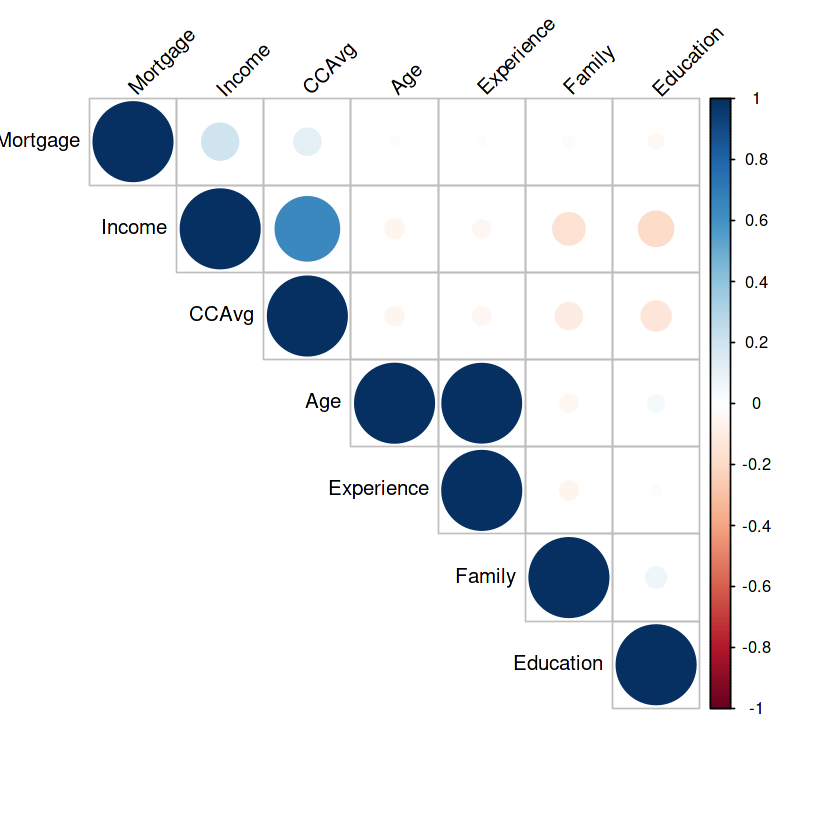

In [19]:
bank<-bankloan %>%select(Age, Experience, Income, Family,CCAvg,Education,Mortgage)  
res<-cor(bank)  
res<-round(res, 3)  
rcorr(as.matrix(bank))  
corrplot(res, type = "upper", order = "hclust",tl.col = "black", tl.srt = 45, sig.level = 0.01, insig = "blank")

**Observation**  
There is high positive correlation between age and experience  
Income and ccavg also shows the strong poistive correlation  
Mortgage and income give a week positive correlation  
Income and family has week negetive correlation  
Income and education surprisingly shows week negetive correlation  
**Correlation Matrix**  
Correlation Matrix also shows the p-value. p-value less than 0.05 indicates the relation is   significant and null hypothesis is rejected. The p-value above 0.05 shows the relation is   insignificant and we can not reject the null hypothesis. 

# Logistic Regression Model

In [20]:
## Logistic Regression Model ##  
# We change the factors back into interger data type to add them into logistic regression model  

bankloan$Securities.Account<-as.numeric(bankloan$Securities.Account)  
bankloan$CD.Account<-as.numeric(bankloan$CD.Account)  
bankloan$Online<-as.numeric(bankloan$Online)  
bankloan$CreditCard<-as.numeric(bankloan$CreditCard)  

## Split the data in train and test ##  
split<-sample.split(bankloan, SplitRatio = .8)  

train<-subset(bankloan, split==TRUE)  
test<-subset(bankloan, split==FALSE)  

### Fit the Model  ###  

logsmodel <- glm( Personal.Loan ~Age+Experience+Income+Family+CCAvg+Education+Mortgage+  
Securities.Account+CD.Account+Online+CreditCard+ZIP.Code,data = train, family = binomial)  

summary(logsmodel)  
summary(logsmodel)$coef  


Call:
glm(formula = Personal.Loan ~ Age + Experience + Income + Family + 
    CCAvg + Education + Mortgage + Securities.Account + CD.Account + 
    Online + CreditCard + ZIP.Code, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9651  -0.2075  -0.0827  -0.0326   3.8736  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.209e+01  4.318e+00  -2.798 0.005134 ** 
Age                -2.961e-02  6.603e-02  -0.449 0.653791    
Experience          3.958e-02  6.586e-02   0.601 0.547888    
Income              5.340e-02  2.842e-03  18.793  < 2e-16 ***
Family              6.743e-01  8.308e-02   8.116 4.81e-16 ***
CCAvg               1.213e-01  4.382e-02   2.768 0.005648 ** 
Education           1.708e+00  1.290e-01  13.240  < 2e-16 ***
Mortgage            7.141e-04  6.016e-04   1.187 0.235269    
Securities.Account -1.044e+00  3.299e-01  -3.164 0.001557 ** 
CD.Account          3.887e+00  3.671e

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.208503e+01,4.318396e+00,-2.7984999,5.134059e-03
Age,-2.961305e-02,6.602668e-02,-0.4485013,6.537914e-01
Experience,3.957587e-02,6.585786e-02,0.6009286,5.478876e-01
Income,5.340358e-02,2.841668e-03,18.7930403,8.610230e-79
Family,6.743120e-01,8.308171e-02,8.1162509,4.808062e-16
CCAvg,1.212816e-01,4.382263e-02,2.7675551,5.647849e-03
Education,1.708293e+00,1.290204e-01,13.2404881,5.121489e-40
Mortgage,7.140722e-04,6.016308e-04,1.1868944,2.352693e-01
Securities.Account,-1.043655e+00,3.298688e-01,-3.1638488,1.556977e-03
CD.Account,3.886730e+00,3.671485e-01,10.5862609,3.451026e-26


**Check Assumptions**
Unlike linear regression the logistic regression does not expect us to check the residuals and ensure the linearity and homoscedasticity but we do need to check that the observations are independent and there is no multicollinearity.
our data is random so the observations are independent. Let's check the multicollinearity.
WE are not treating any outlier here as they look under the range and can give us some important information.


In [21]:
car::vif(logsmodel)

Age         Experience             Income             Family 
         87.051209          86.820288           2.391625           1.325963 
             CCAvg          Education           Mortgage Securities.Account 
          1.459527           1.951595           1.040634           1.452022 
        CD.Account             Online         CreditCard           ZIP.Code 
          2.162700           1.137427           1.383633           1.008043

we can see the age and experience are highly correlated and we need to drop one of them. we are dropping experience here. 
A value of vif above 4 indicates the multicollinearity may exist and value of 10 indicates high multicollinearity and need to be corrected. 

In [22]:
logsmodel <- glm( Personal.Loan ~Age+Income+Family+CCAvg+Education++Mortgage+  
Securities.Account+CD.Account+Online+CreditCard ,data = train, family = binomial)  

summary(logsmodel)  
summary(logsmodel)$coef


Call:
glm(formula = Personal.Loan ~ Age + Income + Family + CCAvg + 
    Education + +Mortgage + Securities.Account + CD.Account + 
    Online + CreditCard, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9579  -0.2102  -0.0824  -0.0327   3.8671  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.458e+01  8.618e-01 -16.924  < 2e-16 ***
Age                 9.876e-03  7.174e-03   1.377  0.16864    
Income              5.345e-02  2.838e-03  18.832  < 2e-16 ***
Family              6.750e-01  8.313e-02   8.120 4.67e-16 ***
CCAvg               1.213e-01  4.379e-02   2.769  0.00562 ** 
Education           1.696e+00  1.272e-01  13.326  < 2e-16 ***
Mortgage            7.133e-04  6.008e-04   1.187  0.23511    
Securities.Account -1.041e+00  3.296e-01  -3.159  0.00158 ** 
CD.Account          3.886e+00  3.667e-01  10.597  < 2e-16 ***
Online             -6.555e-01  1.743e-01  -3.760  0.00017 **

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.458429e+01,0.8617621556,-16.923803,3.003906e-64
Age,9.875989e-03,0.0071742295,1.376592,1.686383e-01
Income,5.344979e-02,0.0028383182,18.831501,4.167781e-79
Family,6.749960e-01,0.0831300995,8.119755,4.671263e-16
CCAvg,1.212621e-01,0.0437921874,2.769034,5.622270e-03
Education,1.695629e+00,0.1272432187,13.325887,1.636747e-40
Mortgage,7.133343e-04,0.0006008046,1.187298,2.351100e-01
Securities.Account,-1.041176e+00,0.3295766123,-3.159131,1.582402e-03
CD.Account,3.885565e+00,0.3666743085,10.596775,3.084344e-26
Online,-6.555377e-01,0.1743388025,-3.760137,1.698206e-04


**Interpretation**
A p-value above 0.05 indicates it is not significant and and null hypothesis can not be rejected. We need to remove those values from our model. we can see the Age and Mortgage are not significant as thier p-value is over 0.05 and should be taken away from the model. 

In [23]:
logsmodel <- glm( Personal.Loan ~Income+Family+CCAvg+Education+  
Securities.Account+CD.Account+Online+CreditCard ,data = train, family = binomial)  

summary(logsmodel)  
summary(logsmodel)$coef  


Call:
glm(formula = Personal.Loan ~ Income + Family + CCAvg + Education + 
    Securities.Account + CD.Account + Online + CreditCard, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9990  -0.2115  -0.0843  -0.0330   3.8631  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -14.039713   0.764948 -18.354  < 2e-16 ***
Income               0.053608   0.002809  19.082  < 2e-16 ***
Family               0.673521   0.082941   8.120 4.64e-16 ***
CCAvg                0.110130   0.043505   2.531 0.011359 *  
Education            1.678491   0.126034  13.318  < 2e-16 ***
Securities.Account  -1.050812   0.329303  -3.191 0.001418 ** 
CD.Account           3.900531   0.367175  10.623  < 2e-16 ***
Online              -0.651066   0.173955  -3.743 0.000182 ***
CreditCard          -1.135980   0.225351  -5.041 4.63e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersio

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-14.03971321,0.764948398,-18.353804,3.077878e-75
Income,0.05360775,0.002809325,19.082073,3.558595e-81
Family,0.67352148,0.082940893,8.120500,4.642688e-16
CCAvg,0.11013041,0.043504980,2.531444,1.135940e-02
Education,1.67849137,0.126033902,13.317777,1.824603e-40
Securities.Account,-1.05081224,0.329303183,-3.191018,1.417727e-03
CD.Account,3.90053140,0.367175167,10.623081,2.327508e-26
Online,-0.65106601,0.173954843,-3.742730,1.820318e-04
CreditCard,-1.13597957,0.225351153,-5.040931,4.632729e-07


**Interpretation**
so, our p-value against each variable is significant now. we can see from the output that the Credit card, Online banking and security account have the negetive relation with personal loan while the rest of variables in our model show a positive relation.

In [24]:
## Prediction ##  
pred<-predict(logsmodel, train, type = "response")  
probs<-ifelse(pred>.547, 1,0)  

## Confusion Matrix ##  
tab<-table(predicted=probs, actuals=train$Personal.Loan)  
tab  
## Check the performance of model ##  
(1-sum(diag(tab))/sum(tab))*100 # Misclassification  
(sum(diag(tab))/sum(tab))*100 # Accuracy  

         actuals
predicted    0    1
        0 3571  157
        1   43  230

[1] 4.99875

[1] 95.00125

The accuracy of our model is over 95% which is not bad but the problem is we are getting some misclassification from class 1. it means our model is missclassifying a lot of 1 as 0. 
Let's test this with test data

In [25]:
predtest<-predict(logsmodel, test, type = "response")  
predtest<- ifelse(predtest>.5, 1,0)  
tabtest<-table(predicted=predtest, actuals=test$Personal.Loan)  
tabtest  
(1-sum(diag(tabtest))/sum(tabtest))*100 # Misclassification   
(sum(diag(tabtest))/sum(tabtest))*100 # Accuracy  

         actuals
predicted   0   1
        0 894  25
        1  12  68

[1] 3.703704

[1] 96.2963

Accuracy comes down a little bit in test data
# ROC Curve
ROC curve is the graph between false positive and true positive rate. in other words this curve gives us cutoff points to find the most optimal value or highest true positive cut off value.


[1] 0.9517621

366 
0.6175195

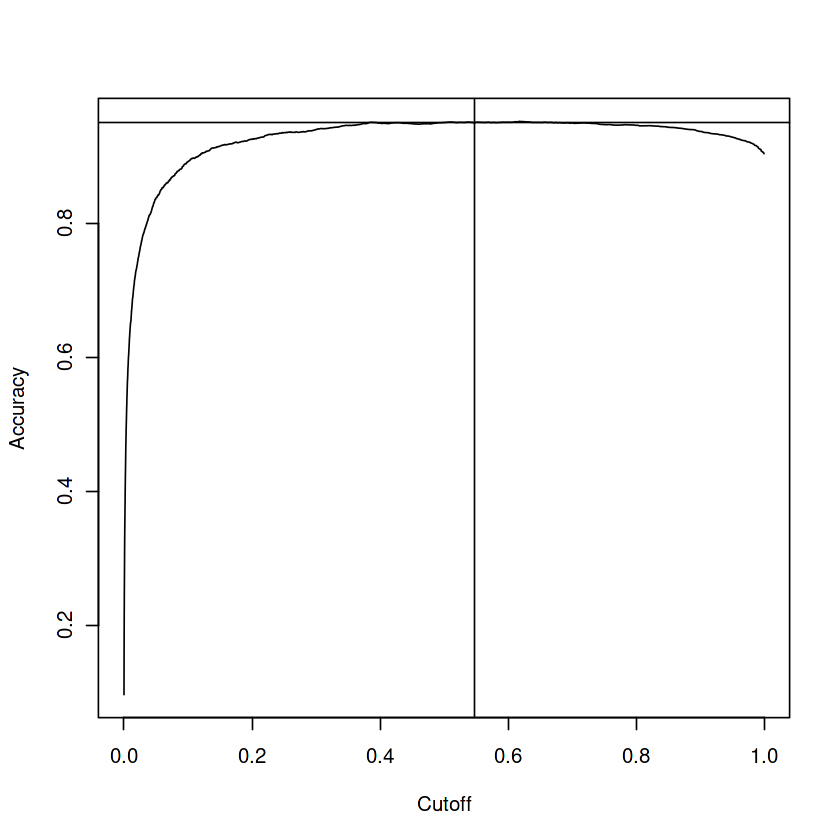

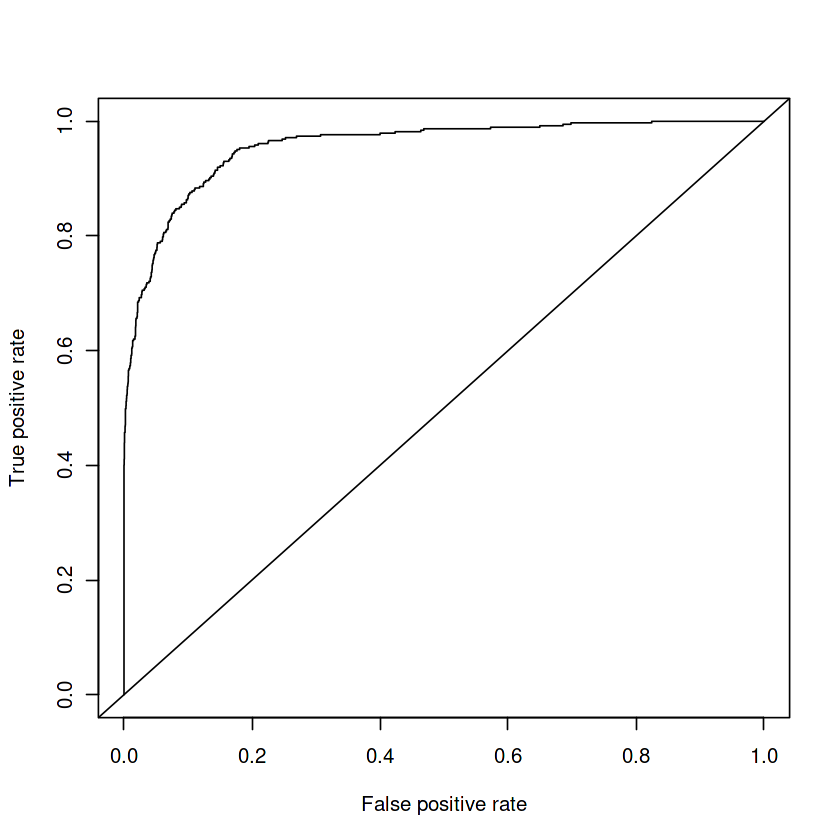

In [26]:
## ROCR Curve ##  
res<-prediction(pred, train$Personal.Loan)  
eval<-performance(res, "acc")  
plot(eval)  
abline(h=.95, v=.547)  
max<-which.max(slot(eval, "y.values")[[1]])  
slot(eval, "y.values")[[1]][max]  
slot(eval, "x.values")[[1]][max]  
roc<-performance(res, "tpr", "fpr")  
plot(roc)  
abline(a=0,b=1)  

Area Under The Curve
The area under the curve tells us the usefulness of test. Greater the value more useful the tes is

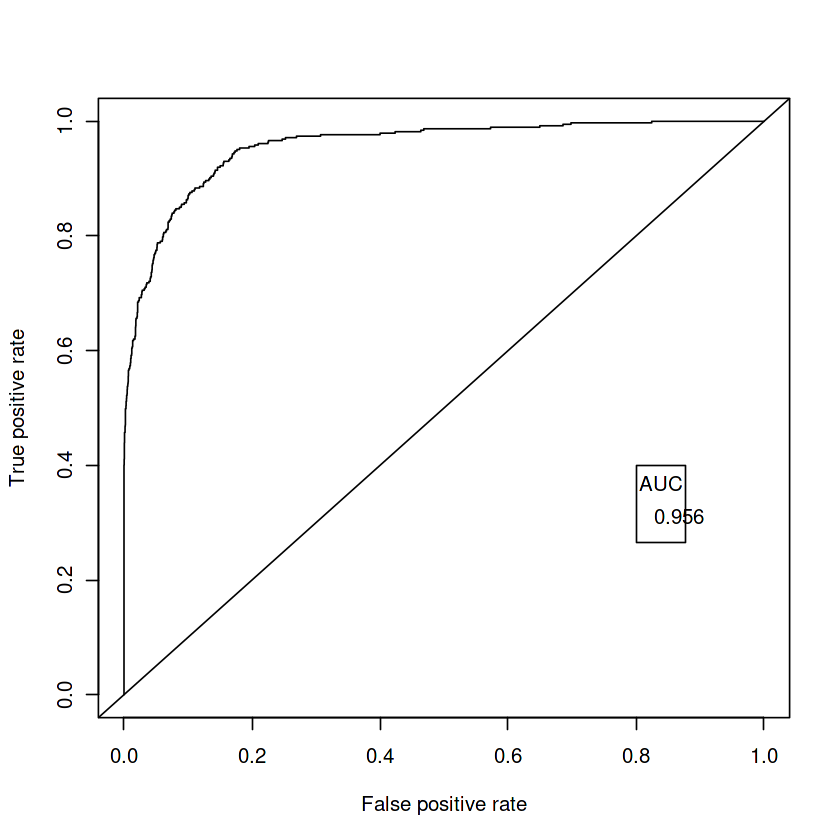

In [27]:
# AUC #  
plot(roc)  
abline(a=0,b=1)  
auc<-performance(res, "auc")  
auc<-unlist(slot(auc, "y.values"))  
auc<-round(auc,3)  
legend(.8,.4,auc, title = "AUC")  

# Decision Tree
we are using all vriables in decision tree as it is non parametric and do not require assumption like regression. Also, it can handle the outliers and missing values

[1] 0 0 0 0 0 0
Levels: 0 1

          
mytreepred    0    1
         0 3596   32
         1   18  355

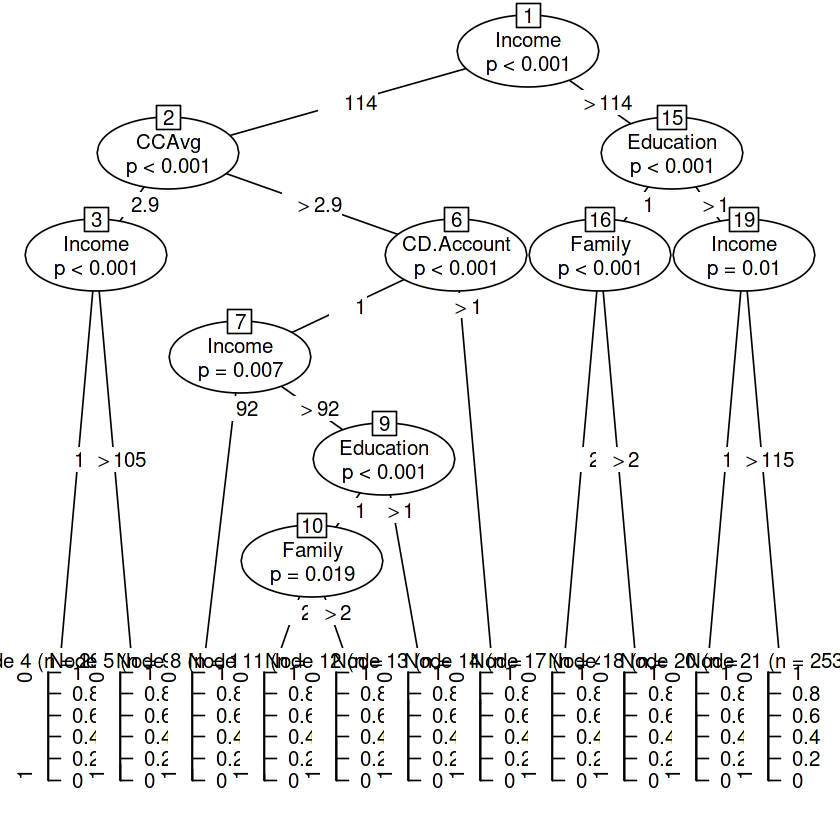

In [28]:
## CTree Package  
mytree<-ctree(Personal.Loan ~Age+Experience+Income+Family+CCAvg+Education+Securities.Account+CD.Account+Online+CreditCard ,data = train)  
plot(mytree)  

##### Prediction #####

mytreepred<-predict(mytree, train)  
head(mytreepred)  
# Confusion Matrix #  
table(mytreepred, train$Personal.Loan)  

**Observation**
we can see the decision tree is better classifyer in this case than the logistic regression. but still we can see more misclassification in class 1. it means becasue the class 0 is dominant class, our classifyer is a bit biased towards class 0 and misclassifying the class 1. more 1s as misclassified as 0 whenever they should be 1

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

           
mytree2pred    0    1
          0 3596   32
          1   18  355

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3596   32
         1   18  355
                                          
               Accuracy : 0.9875          
                 95% CI : (0.9836, 0.9907)
    No Information Rate : 0.9033          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9273          
                                          
 Mcnemar's Test P-Value : 0.06599         
                                          
            Sensitivity : 0.9950          
            Specificity : 0.9173          
         Pos Pred Value : 0.9912          
         Neg Pred Value : 0.9517          
             Prevalence : 0.9033          
         Detection Rate : 0.8988          
   Detection Prevalence : 0.9068          
      Balanced Accuracy : 0.9562          
                                          
       'Positive' Class : 0               
                        

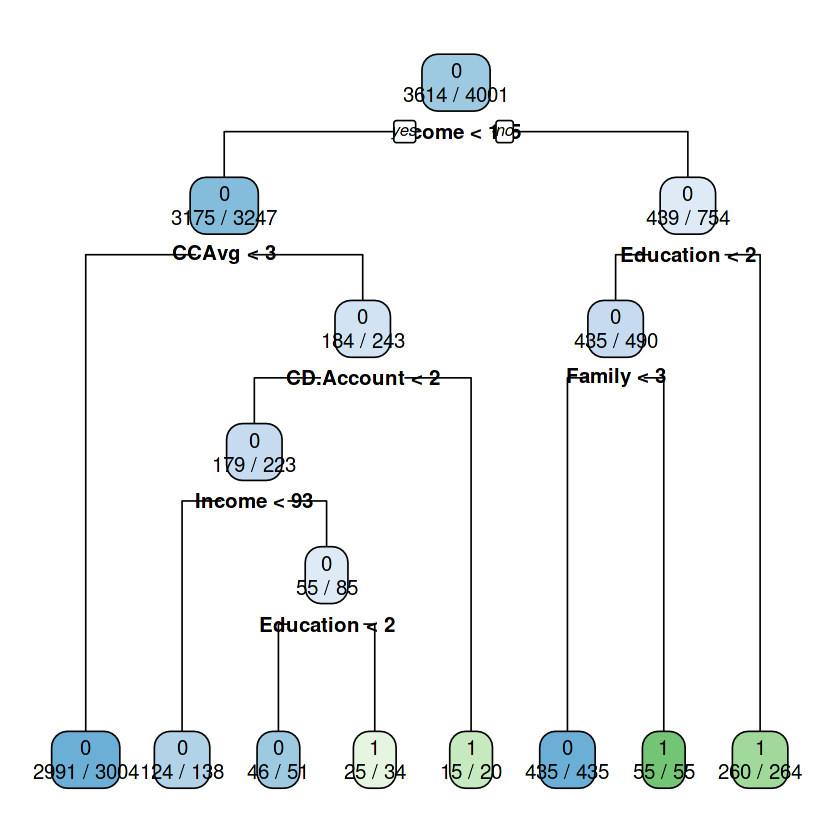

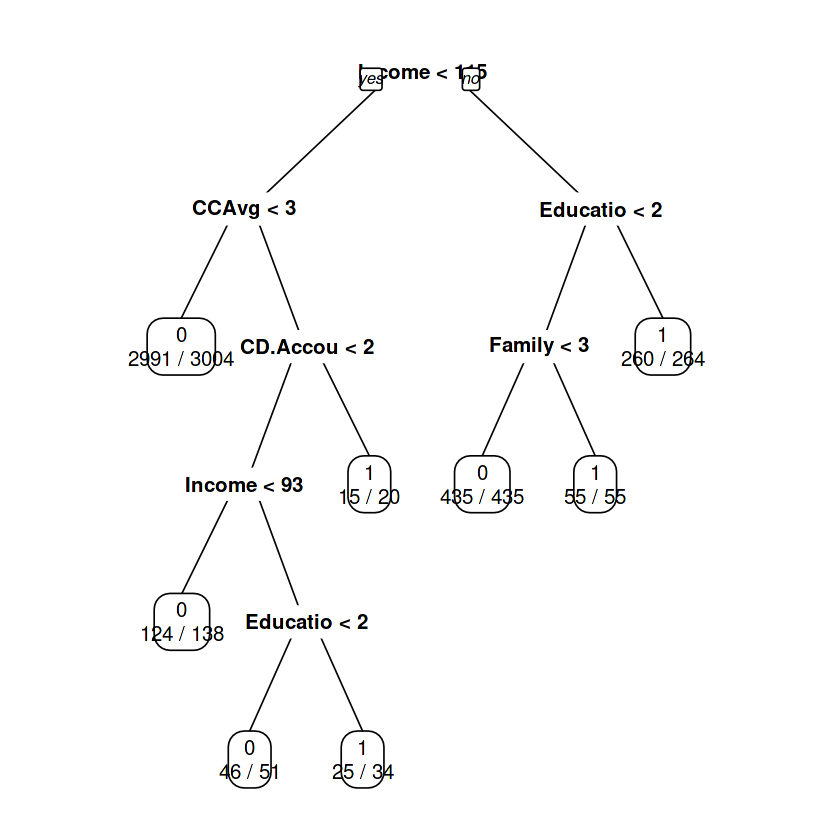

In [29]:
#RPart Package

mytree2<-rpart(Personal.Loan ~Age+Experience+Income+Family+CCAvg+Education+Securities.Account+CD.Account+Online+CreditCard ,data = train)  
rpart.plot(mytree2, extra = 2)  

## Prediction ##  

mytree2pred<-predict(mytree2, train, type = "class")  
head(mytree2pred)  
table(mytree2pred, train$Personal.Loan)  
confusionMatrix(mytree2pred, train$Personal.Loan)  
prp(mytree2, extra = 2)  

**Interpretation**  
in our case we do not want any 1 as misclassified because it simply means we missed an opportunity.  prediction of 1 as 0 means the customer opted the loan whenever our classifier says no.  
According to decison tree plot, the income is the most important factor and hence is on the top on   the tree.  
# Handle the Class Imbalance  
Lets handle the class imbalance as our model looks like a bit biased towards dominant class which is  0 in our case.  


   0    1 
3614 3170 

[1] 0 0 0 0 0 0
Levels: 0 1

      
ctpred    0    1
     0 3555   27
     1   59 3143

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3555   27
         1   59 3143
                                          
               Accuracy : 0.9873          
                 95% CI : (0.9844, 0.9898)
    No Information Rate : 0.5327          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9746          
                                          
 Mcnemar's Test P-Value : 0.0008293       
                                          
            Sensitivity : 0.9837          
            Specificity : 0.9915          
         Pos Pred Value : 0.9925          
         Neg Pred Value : 0.9816          
             Prevalence : 0.5327          
         Detection Rate : 0.5240          
   Detection Prevalence : 0.5280          
      Balanced Accuracy : 0.9876          
                                          
       'Positive' Class : 0               
                        

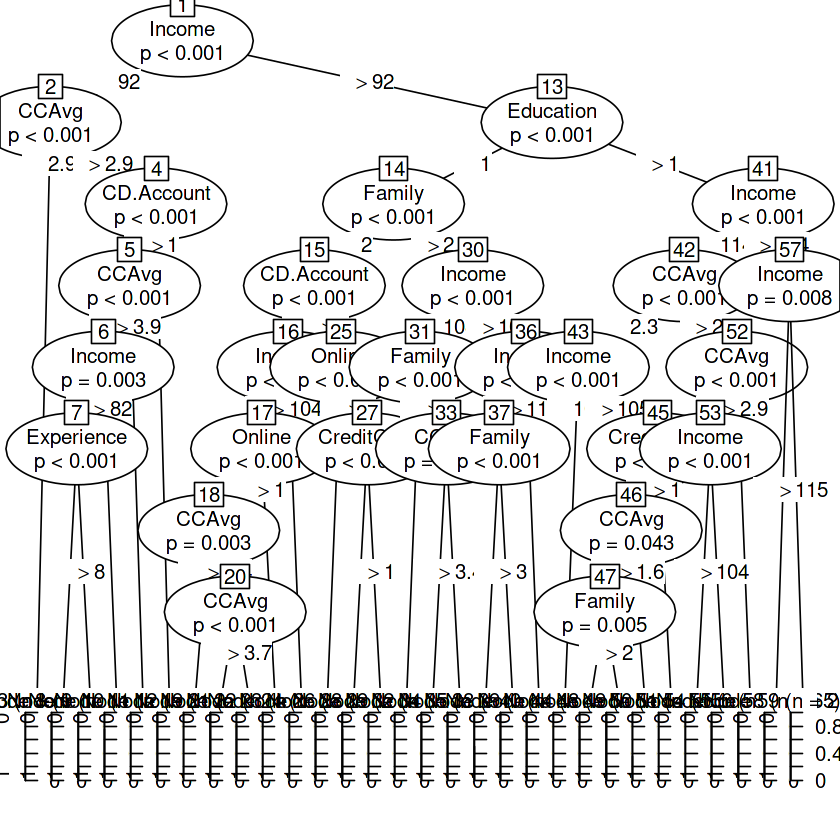

In [30]:
# Handle the class imbalance  
overbal<-ovun.sample(Personal.Loan~Age+Experience+Income+Family+CCAvg+Education+  
Securities.Account+CD.Account+Online+CreditCard,data=train, method = "over", N=6784)$data  
table(overbal$Personal.Loan)  
##### Decision Tree after handling class imbalance method over ##  

ct<-ctree(Personal.Loan ~Age+Experience+Income+Family+CCAvg+Education+Securities.Account+CD.Account+Online+CreditCard ,data = overbal)  
plot(ct)  
##### Prediction #####  

ctpred<-predict(ct, overbal)  
head(ctpred)  

# Confusion Matrix #  
table(ctpred, overbal$Personal.Loan)  
confusionMatrix(ctpred, overbal$Personal.Loan)  

**Interpretation**  
We can see our classifier is now only misclassifieng 5 ones as 0. in previous case they were 35. so we are improved pretty much.

1 2 3 4 5 6 
0 0 0 1 0 0 
Levels: 0 1

        
predover    0    1
       0 3455  201
       1  159 2969

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3455  201
         1  159 2969
                                          
               Accuracy : 0.9469          
                 95% CI : (0.9413, 0.9521)
    No Information Rate : 0.5327          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8933          
                                          
 Mcnemar's Test P-Value : 0.0307          
                                          
            Sensitivity : 0.9560          
            Specificity : 0.9366          
         Pos Pred Value : 0.9450          
         Neg Pred Value : 0.9492          
             Prevalence : 0.5327          
         Detection Rate : 0.5093          
   Detection Prevalence : 0.5389          
      Balanced Accuracy : 0.9463          
                                          
       'Positive' Class : 0               
                        

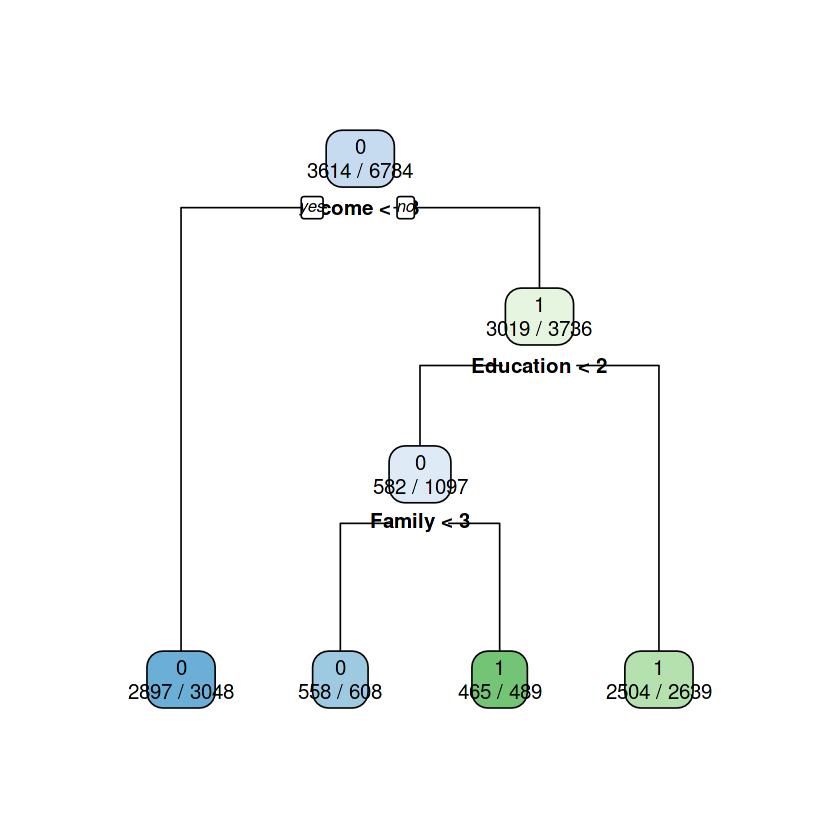

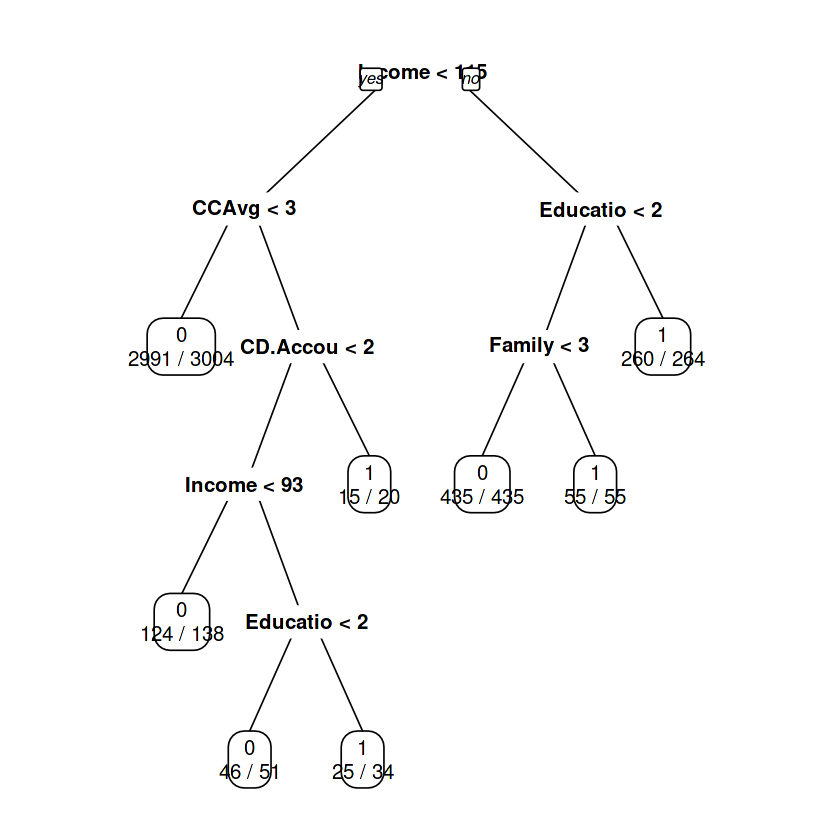

In [31]:

### Using RPART package  ##  

mytreeover<-rpart(Personal.Loan ~Age+Experience+Income+Family+CCAvg+Education+  
Securities.Account+CD.Account+Online+CreditCard ,data = overbal)  

rpart.plot(mytreeover, extra = 2)  
## Prediction ##  

predover<-predict(mytreeover, overbal, type = "class")  
head(predover)  

# Confusion Matrix #  
table(predover, overbal$Personal.Loan)  
confusionMatrix(predover,overbal$Personal.Loan )  
prp(mytree2, extra = 2)  



Interpretation
Overall the accuracy of Rpart package is almost same but we can see the misclassified 1s are more than the Ctree package. 
We also can see the Rpart tree is carrying less data as compared to ctree. we try to prune the tree built from Ctree and then check the accuracy.

In [32]:
# MissClassifitation 1s Rate before handling class Imbalance #
confusionMatrix(mytree2pred, train$Personal.Loan)  
26/(25+362+25)*100  
# MissClassifitation 1s Rate after handling class Imbalance #  
confusionMatrix(predover,overbal$Personal.Loan )  
201/(201+154+2971)*100  

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3596   32
         1   18  355
                                          
               Accuracy : 0.9875          
                 95% CI : (0.9836, 0.9907)
    No Information Rate : 0.9033          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9273          
                                          
 Mcnemar's Test P-Value : 0.06599         
                                          
            Sensitivity : 0.9950          
            Specificity : 0.9173          
         Pos Pred Value : 0.9912          
         Neg Pred Value : 0.9517          
             Prevalence : 0.9033          
         Detection Rate : 0.8988          
   Detection Prevalence : 0.9068          
      Balanced Accuracy : 0.9562          
                                          
       'Positive' Class : 0               
                        

[1] 6.31068

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3455  201
         1  159 2969
                                          
               Accuracy : 0.9469          
                 95% CI : (0.9413, 0.9521)
    No Information Rate : 0.5327          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8933          
                                          
 Mcnemar's Test P-Value : 0.0307          
                                          
            Sensitivity : 0.9560          
            Specificity : 0.9366          
         Pos Pred Value : 0.9450          
         Neg Pred Value : 0.9492          
             Prevalence : 0.5327          
         Detection Rate : 0.5093          
   Detection Prevalence : 0.5389          
      Balanced Accuracy : 0.9463          
                                          
       'Positive' Class : 0               
                        

[1] 6.043295

# Model Results
So, we can see, by handling class imbalance there is some improvement in specificity but overall accuracy is decreased. our model after handling the class imbalance shows improvement while correctly classifying the 1s but overall accuracy comes down. so, what kind of model is needed, it depends on the requirements. in our case we need a model that does not misclassify the 1s as we are missing an oppurtunity becasue our model shows that the customer is not getting a loan but infact they are.
so, what kind of model is required it depends on the situation. taking the example of Covid, we want our model to corrrectly classify all positive but we can compromise a little bit on the negetive as to classify negetive as positive is not as bad as classifying positive as negetive. 
overall, our model accuracy is above 95% which is not bad. Also, the accuracy of decision tree is better than the logistic regression. 

# Random Forest
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.However,It performs better results for classification problems.

# Working of Random Forest
Random Forest uses an ensamble technique called Bagging also known as Bootstrap aggregation. In simple words Ensamble is to get results after combining different models. instead of relying on one model as we have seen in other Classification Models in this session like Logistic Regression and Decision Tree.  
Instead Random Forest builds different decision trees on different subsets taken from the same datasets using the replacement method,taking the output from all of those decision trees and finally predicting the output on majority voting also called as Bootstrap aggregation. 

# Random Forest Model

In [33]:
rf<-randomForest(Personal.Loan ~Age+Experience+Income+Family+CCAvg+Education+  
    Securities.Account+CD.Account+Online+CreditCard ,data = train)  
print(rf)


Call:
 randomForest(formula = Personal.Loan ~ Age + Experience + Income +      Family + CCAvg + Education + Securities.Account + CD.Account +      Online + CreditCard, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.25%
Confusion matrix:
     0   1 class.error
0 3607   7 0.001936912
1   43 344 0.111111111


# Interpretation of Random Forest Model Result  
OOB (Out of Bag) error is 1.18%. Random forest model put aside subset for cross validation and after testing that subest we get OOB error. We can also see the confusion matrix obtained after building the model

In [34]:
# Attributes of model. we can check them one by one with model.   
attributes(rf)

$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

# Random Forest Model Prediction

In [35]:
# Prediction  
rfpred<-predict(rf, train)  
# Check Predictions  
head(rfpred)  
head(train$Personal.Loan)  

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

[1] 0 0 0 0 0 0
Levels: 0 1

# Confusion Matrix in Random Forest

In [36]:
# Confusion Matrix  
confusionMatrix(rfpred, train$Personal.Loan)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3614    0
         1    0  387
                                     
               Accuracy : 1          
                 95% CI : (0.9991, 1)
    No Information Rate : 0.9033     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.9033     
         Detection Rate : 0.9033     
   Detection Prevalence : 0.9033     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

# Cross Validation with Test Data

In [37]:
#Prediction Test Data  
rftestpred<-predict(rf, test)  
# Confusion Matrix  
confusionMatrix(rftestpred, test$Personal.Loan)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 901   6
         1   5  87
                                          
               Accuracy : 0.989           
                 95% CI : (0.9804, 0.9945)
    No Information Rate : 0.9069          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9345          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9945          
            Specificity : 0.9355          
         Pos Pred Value : 0.9934          
         Neg Pred Value : 0.9457          
             Prevalence : 0.9069          
         Detection Rate : 0.9019          
   Detection Prevalence : 0.9079          
      Balanced Accuracy : 0.9650          
                                          
       'Positive' Class : 0               
                              

We can see the accuracy is decreased while validating with test data.

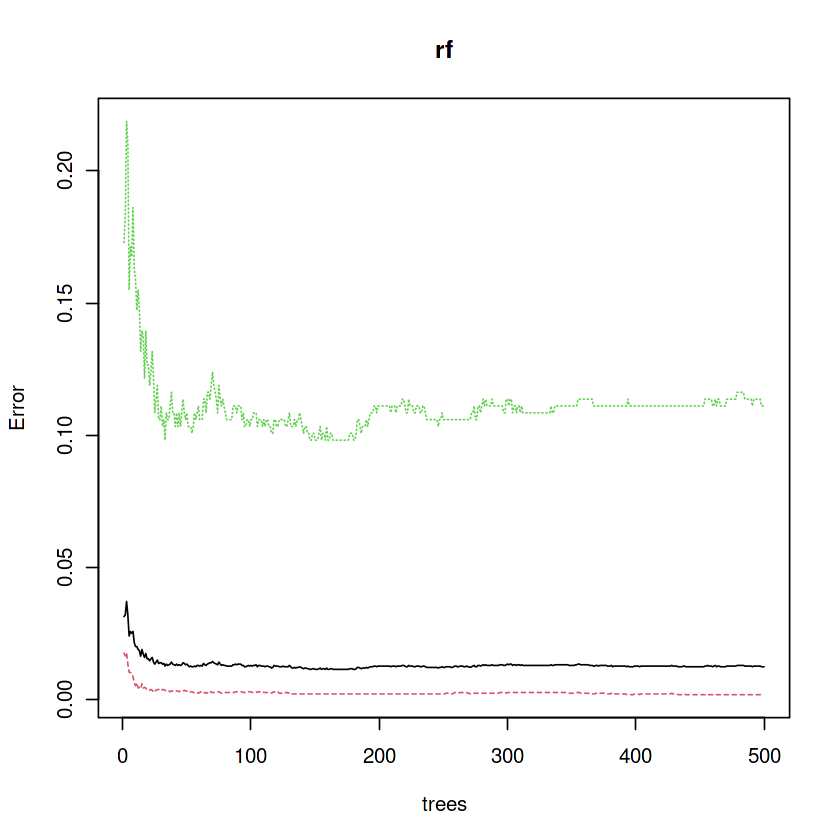

In [38]:
## Plot Random Forest to check the Error rate   
plot(rf)  

**Interpretation**  
The graph shows the error rate is stabilized after 300 trees. 

# Tune Random Forest Model  
We are using 300 trees in our model. the mtry we are using here is 6 as at this number we are getting least OOB error.  

In [39]:
tunedrf<-randomForest(Personal.Loan ~Age+Experience+Income+Family+CCAvg+Education+  
        Securities.Account+CD.Account+Online+CreditCard ,data = train,  
        ntree=300, mtry=6, proximity=TRUE, importance=TRUE)  
print(tunedrf)


Call:
 randomForest(formula = Personal.Loan ~ Age + Experience + Income +      Family + CCAvg + Education + Securities.Account + CD.Account +      Online + CreditCard, data = train, ntree = 300, mtry = 6,      proximity = TRUE, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 6

        OOB estimate of  error rate: 1.27%
Confusion matrix:
     0   1 class.error
0 3601  13 0.003597122
1   38 349 0.098191214


In [40]:
# Prediction Tuned Random Forest  
tunedrfpred<-predict(tunedrf, train)  
# Check head Prediction  
head(tunedrfpred)  
head(train$Personal.Loan)  

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

[1] 0 0 0 0 0 0
Levels: 0 1

# Confusion Matrix of tuned Random Forest with Train Data

In [41]:
# Confusion Matrix of Train Data  
confusionMatrix(tunedrfpred, train$Personal.Loan)  

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3614    0
         1    0  387
                                     
               Accuracy : 1          
                 95% CI : (0.9991, 1)
    No Information Rate : 0.9033     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.9033     
         Detection Rate : 0.9033     
   Detection Prevalence : 0.9033     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

# Confusion Matrix of tuned Random Forest with Test Data

In [42]:
# Prediction Test Data  
tunedrftestpred<-predict(tunedrf, test)  

# Confusion Matrix   
confusionMatrix(tunedrftestpred, test$Personal.Loan)  

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 902   6
         1   4  87
                                          
               Accuracy : 0.99            
                 95% CI : (0.9817, 0.9952)
    No Information Rate : 0.9069          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9401          
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.9956          
            Specificity : 0.9355          
         Pos Pred Value : 0.9934          
         Neg Pred Value : 0.9560          
             Prevalence : 0.9069          
         Detection Rate : 0.9029          
   Detection Prevalence : 0.9089          
      Balanced Accuracy : 0.9655          
                                          
       'Positive' Class : 0               
                              

**Interpretation**  
The overall accuracy in test data is decreased but it is still better than the test data before tuning. Also, we can see a bit improvement in specificity. 

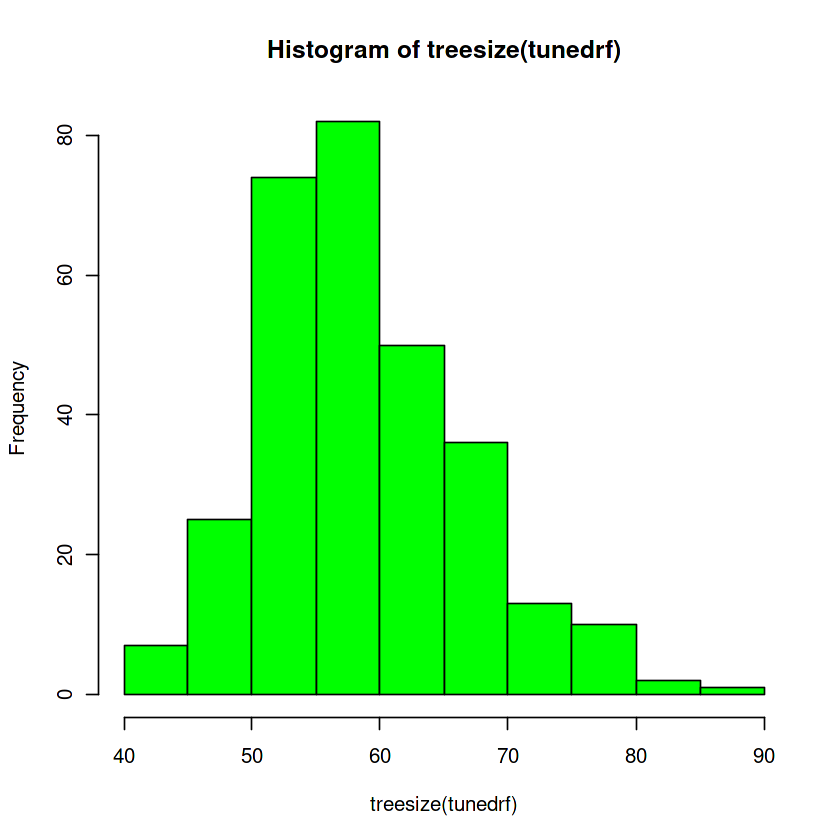

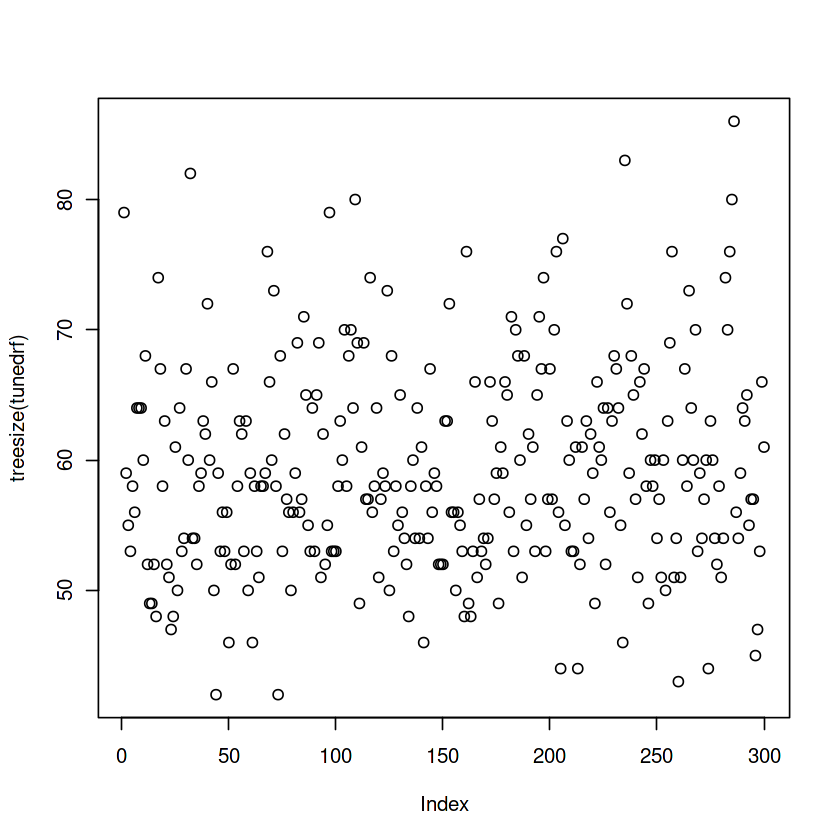

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Age,12.074700,1.43996344,12.3745455,18.098381
Experience,10.826371,1.00198322,11.0706992,16.552043
Income,208.193791,95.34179351,213.2051423,235.664571
Family,135.634089,50.94071785,138.9968626,106.732034
CCAvg,31.508365,38.01540940,37.1258523,80.380877
Education,171.643024,73.29818030,183.3074653,209.471418
Securities.Account,-1.148008,1.95636376,0.7391351,1.343150
CD.Account,11.967580,6.65247120,14.1877082,22.876452
Online,6.637969,-0.18375937,6.0435503,3.824102
CreditCard,7.483514,0.02803656,6.5891647,4.310508


[1] 2405 2315 3788 2016 3260 1590  241  667  611  557

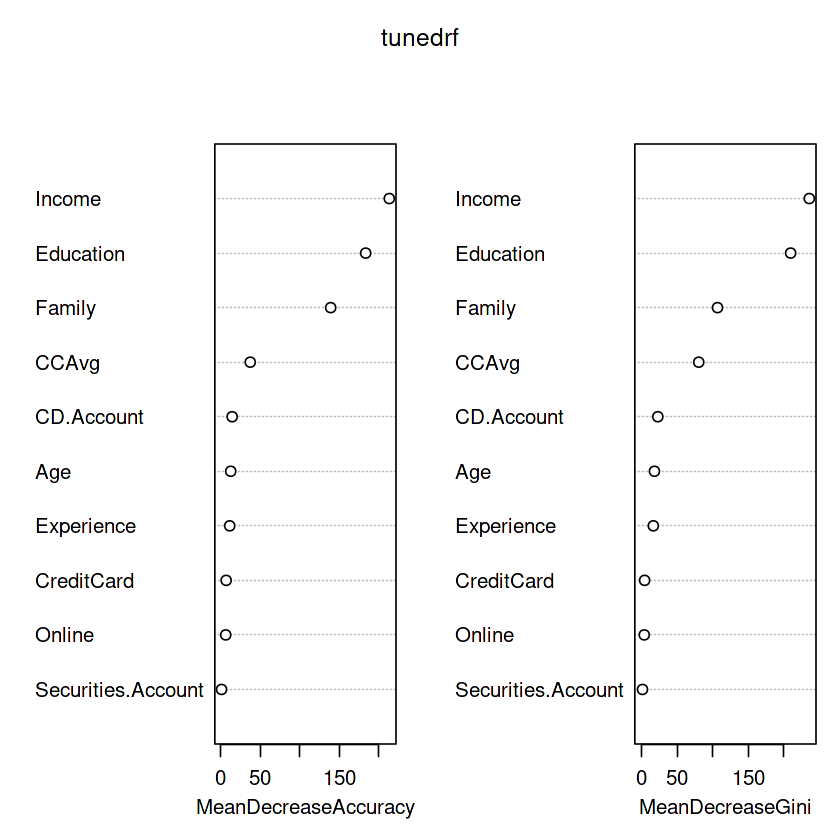

In [43]:
# Histogram of Nodes  
hist(treesize(tunedrf), col='green')  
# Plot Tree size 
plot(treesize(tunedrf))  
# Importance of variables  
varImpPlot(tunedrf)  
# importance of variables quantitativly
importance(tunedrf)  
# Number of times each variable is used  
varUsed(tunedrf)  

**Interpretation**  
The Income is most important factor while deciding the loan followed by education and family. The right graph tells us the mean decrease gini. As we move from top to bottom removing variables the impurity is decreased and finally reach to 0 at the bottom.

Warning message in RColorBrewer::brewer.pal(nlevs, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


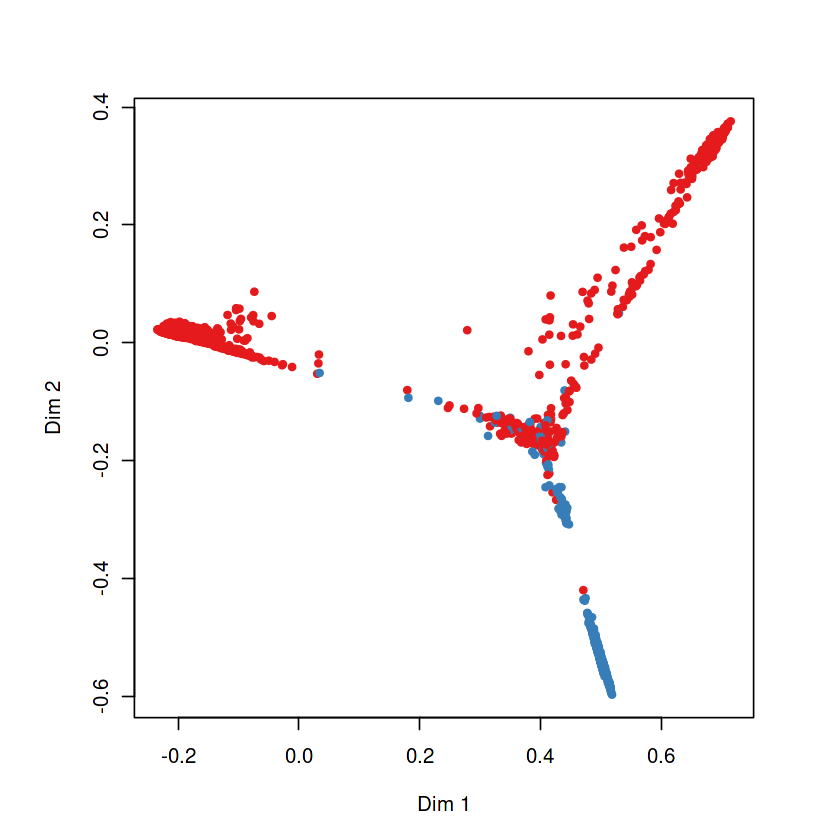

In [44]:
#Multidimensional scalling plot of proximity matrix  
MDSplot(tunedrf, train$Personal.Loan)

# Observation  
From all three models we can see the random forest performs the best while logistic regression accuracy is least on test data. 